<h1 align=center > Insurance Claim Analysing and Predicting </h1>

In [1]:
# import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv('data/insurance_data.csv')
df.sample(10)

index  PatientID   age  gender   bmi  bloodpressure diabetic  children  \
626     626        627  23.0    male  27.5             97       No         3   
444     444        445  27.0    male  24.3             82       No         2   
1025   1025       1026  59.0  female  31.8            103      Yes         0   
479     479        480  35.0    male  16.8             98       No         2   
716     716        717  40.0    male  30.5             91       No         0   
37       37         38  34.0    male  25.6             83       No         0   
82       82         83  42.0    male  31.3             98       No         0   
1187   1187       1188  25.0  female  17.8             83       No         2   
216     216        217  26.0    male  25.7             91       No         2   
1191   1191       1192  29.0    male  30.7             94       No         0   

     smoker     region     claim  
626      No  southwest   8615.30  
444      No  northwest   6198.75  
1025     No  southeast  17929.30  
479      No  southeast   6640.54  
716      No  northeast  10072.06  
37       No  northwest   1632.56  
82       No  northwest   1909.53  
1187    Yes  northwest  32734.19  
216      No  northeast   3279.87  
1191    Yes  northeast  33475.82

### Dimension of data

In [5]:
df.shape

(1340, 11)

### How Many Null Values

In [6]:
df.isnull().sum()

index            0
PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

> **Observation:** **Age** has 5 and **region** has 3 null values 

### What type of data is?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


In [8]:
sns.set_context('paper', font_scale = 2)
sns.set_style('darkgrid')

### Data Cleaning

In [9]:
df.drop(columns=['index','PatientID'],inplace=True)
df.head()

age gender   bmi  bloodpressure diabetic  children smoker     region  \
0  39.0   male  23.2             91      Yes         0     No  southeast   
1  24.0   male  30.1             87       No         0     No  southeast   
2   NaN   male  33.3             82      Yes         0     No  southeast   
3   NaN   male  33.7             80       No         0     No  northwest   
4   NaN   male  34.1            100       No         0     No  northwest   

     claim  
0  1121.87  
1  1131.51  
2  1135.94  
3  1136.40  
4  1137.01

### Why do EDA?

- Analysis and reporting
- Validate assumptions
- Handling missing values
- detecting outliers
- feature engineering
- Model building

### Separate out Categorical and Numerical Features

In [10]:
cat_cols = df.select_dtypes(exclude=np.number).columns.to_list()
print("Categorical columns : ", cat_cols)

Categorical columns :  ['gender', 'diabetic', 'smoker', 'region']


In [11]:
num_cols = df.select_dtypes(include=np.number).columns.to_list()
print("Numerical columns : ", num_cols)

Numerical columns :  ['age', 'bmi', 'bloodpressure', 'children', 'claim']


### Seperated Columns

- **Numerical** - age,bmi,bloodpressure,claim
- **Categorical** -gender, diabetic,children,smoker, region

### Uni Variant EDA

> ### Age 

> - **Missing Values** 3 
> - **Shape** Appears bimodal, with peaks around 30-35 and 40-45.
> - **Outliers** No

In [12]:
df['age'].describe()

count    1335.000000
mean       38.078652
std        11.102924
min        18.000000
25%        29.000000
50%        38.000000
75%        47.000000
max        60.000000
Name: age, dtype: float64

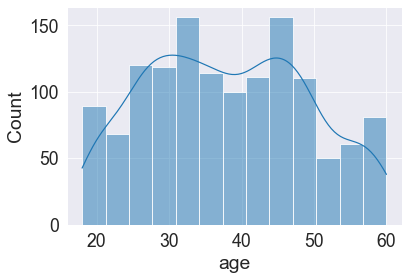

In [13]:
sns.histplot(df['age'],kde=True);

> - ###   Appears Almost binomial, with peaks around 30-35 and 40-45.

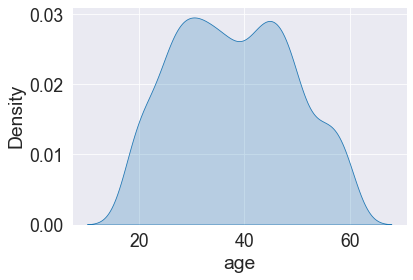

In [14]:
sns.kdeplot(df['age'],fill=True);

In [15]:
df['age'].skew()

0.11361133741072633

In [16]:
df.isnull().sum()

age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [17]:
df['age'].isnull().sum()

5

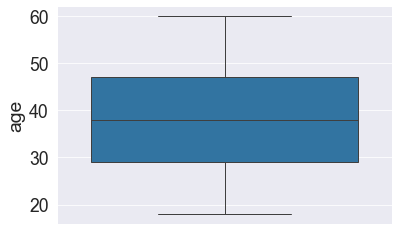

In [18]:
sns.boxplot(df['age']);

> Observation: <h3>No Outliers</h3>

### Catagorical_Data_Frame

In [19]:
cat_df = pd.DataFrame()

> ### BMI

> - **Missing Values**     0 
> - **Shape** Noraml Distriubution
. - **Outliers** 4 max 

In [20]:
df['bmi'].describe()

count    1340.000000
mean       30.668955
std         6.106735
min        16.000000
25%        26.275000
50%        30.400000
75%        34.700000
max        53.100000
Name: bmi, dtype: float64

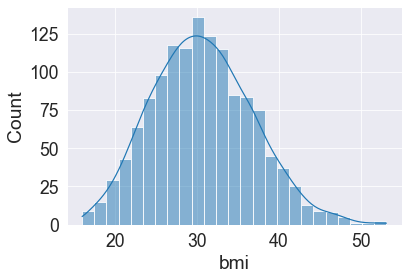

In [21]:
sns.histplot(df['bmi'],kde=True);

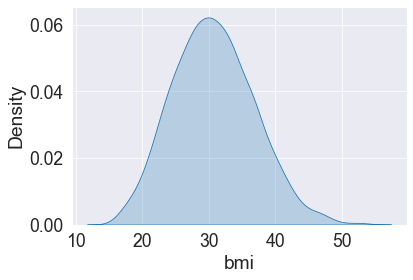

In [22]:
sns.kdeplot(df['bmi'],fill=True);

> ###  **Observation:** Normally Distributed

### Outliers Detection

In [23]:
upper_limit= df['bmi'].mean()+3*df['bmi'].std()
upper_limit

48.989159524406574

In [24]:
tmp_bmi = df['bmi']

In [25]:
df[df['bmi']>upper_limit].shape

(4, 9)

> - #### There are 4 outliers in BMI

### Removing Outliers 

In [26]:
df['bmi']= np.where(df['bmi'] >upper_limit,upper_limit,df['bmi'])

In [27]:
df[df['bmi']>upper_limit].shape

(0, 9)

> - #### There are 0 outliers After Removalo of Outliers

In [28]:
def bmi_categorizer(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 24.9:
        return "Healthy"
    elif 25 <= bmi < 29.9:
        return "Overweight"
    elif bmi >= 30 and bmi < 40:
        return "Obese"
    else:
        return "Very Obese"

cat_df['bmi'] = df['bmi'].apply(bmi_categorizer)

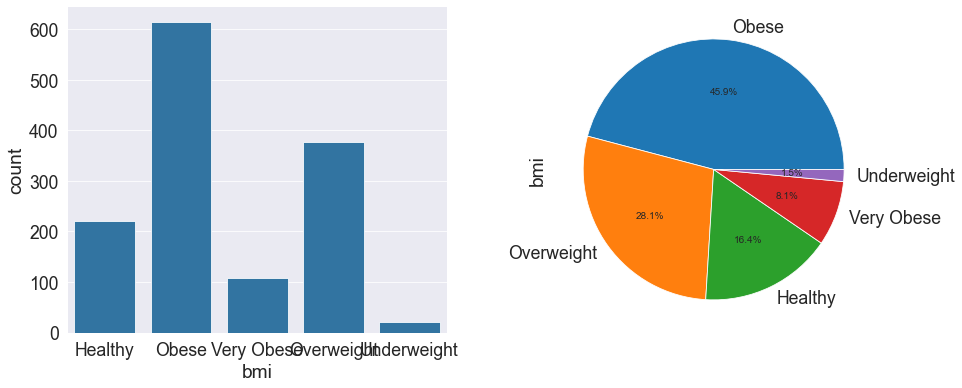

In [29]:
fig = plt.figure(figsize=(15,6))
(ax1,ax2) = fig.subplots(1,2)
sns.countplot(x=cat_df['bmi'],ax=ax1)
cat_df['bmi'].value_counts().plot(kind='pie',autopct='%0.1f%%',ax=ax2);

> ### BMI Observations
> - #### Normally distributed with 4 outliers.
> - #### Predominantly obese patients and very few underweight individuals.

### Blood Pressure

- **Missing Values**     0 
- **Shape** Highly Positive Skewed
- **Outliers** 4.6 % Outliers 

In [30]:
df['bloodpressure'].describe()

count    1340.000000
mean       94.157463
std        11.434712
min        80.000000
25%        86.000000
50%        92.000000
75%        99.000000
max       140.000000
Name: bloodpressure, dtype: float64

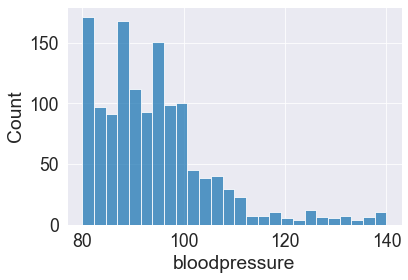

In [31]:
sns.histplot(df['bloodpressure']);

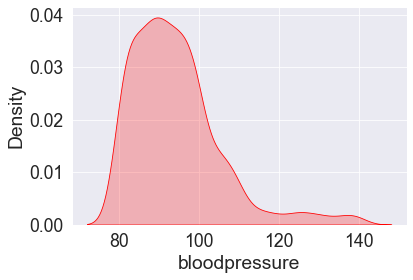

In [32]:
sns.kdeplot(df['bloodpressure'], fill=True, color='red', cbar=True);

In [33]:
df['bmi'].max()

48.989159524406574

In [34]:
df['bloodpressure'].skew()

1.4835342102293079

In [35]:
def bp_categorizer(bp):
    if 80<=bp < 89:
        return "elevated"
    elif 90<= bp <= 99:
        return "High"
    elif  99< bp <100:
        return "very high"
    elif 100<=bp<120:
        return "extremely high"
    else:
        return "fatal"

cat_df['bloodpressure'] = df['bloodpressure'].apply(bp_categorizer)

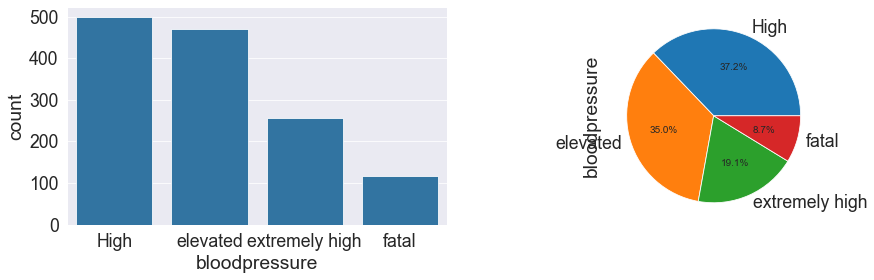

In [36]:
fig = plt.figure(figsize=(15,4))
(ax1,ax2) = fig.subplots(1,2)
sns.countplot(x=cat_df['bloodpressure'],ax=ax1)
cat_df['bloodpressure'].value_counts().plot(kind='pie',autopct='%0.1f%%',ax=ax2);


> ### Blood Pressure Distribution

> - #### Highly positively skewed.
> - #### Approximately 35% of patients exhibit elevated BP, while 4.3% are in a critical state (fatal).


### Outliers Detection

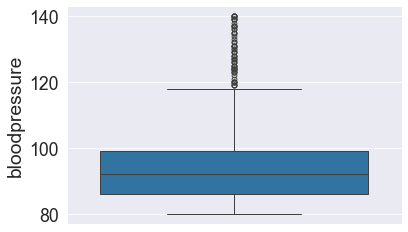

In [39]:
sns.boxplot(df['bloodpressure']);

In [40]:
df.shape

(1340, 9)

### Removing Outliers 

In [41]:
iqr = df['bloodpressure'].quantile(0.75) - df['bloodpressure'].quantile(0.25)
upper_limit= df['bloodpressure'].quantile(0.75) + iqr *1.5
df[df['bloodpressure']>upper_limit].shape

(62, 9)

In [42]:
tmp_bp = df['bloodpressure']

In [43]:
df[df['bloodpressure']>upper_limit].shape[0]/df.shape[0]*100

4.626865671641791

> #### - There are 62 Outliers in BloodPressure Column Which Is 4% of the data 

In [44]:
df['bloodpressure']= np.where(df['bloodpressure'] >upper_limit,upper_limit,df['bloodpressure'])

### After Removal of Outliers

In [45]:
df[df['bloodpressure']>upper_limit].shape[0]/df.shape[0]*100

0.0

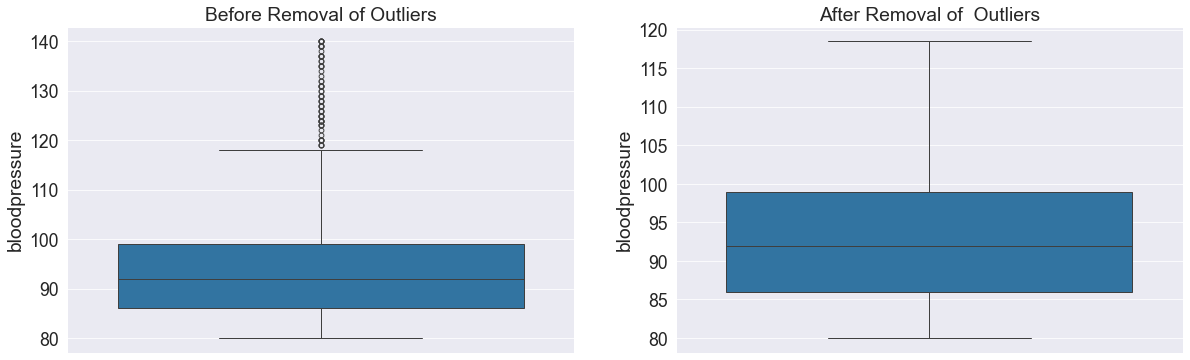

In [46]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
ax1.set_title('Before Removal of Outliers')
sns.boxplot(tmp_bp,ax=ax1);
ax2.set_title('After Removal of  Outliers');
sns.boxplot(df['bloodpressure'],ax=ax2);

### claim

- **Missing Values**     0 
- **Shape** Positive Skewed
- **Outliers** 4.6 % Outliers 

In [47]:
df['claim'].describe()

count     1340.000000
mean     13252.745642
std      12109.609288
min       1121.870000
25%       4719.685000
50%       9369.615000
75%      16604.305000
max      63770.430000
Name: claim, dtype: float64

In [48]:
df['claim'].skew()

1.5167468509489237

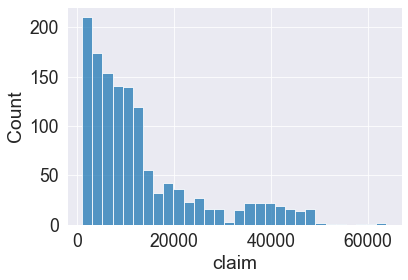

In [49]:
sns.histplot(df['claim']);

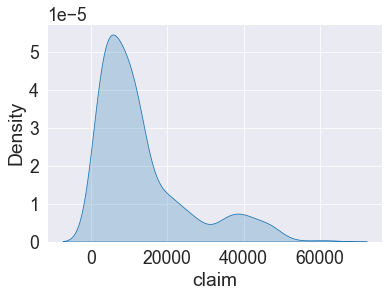

In [50]:
sns.kdeplot(df['claim'],fill=True);

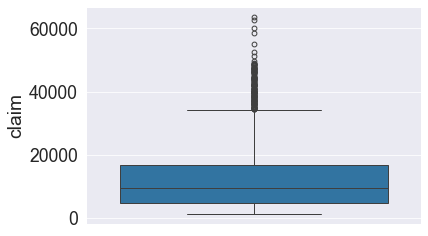

In [51]:
sns.boxplot(df['claim']);

> ### Claim

> - #### Outliers are 10% of the data.
> - #### highly positively skewed nature.

### Removing Outliers 

In [52]:
iqr = df['claim'].quantile(0.75) - df['claim'].quantile(0.25)
upper_limit= df['claim'].quantile(0.75) + iqr *1.5
df[df['claim']>upper_limit].shape[0]

141

In [53]:
(df[df['claim']>upper_limit].shape[0]/df.shape[0])*100

10.522388059701493

- There are 141 Outliers in Claim  Which Is 10% of the data 

In [54]:
tmp_claim = df['claim']

In [55]:
df['claim']= np.where(df['claim'] >upper_limit,upper_limit,df['claim'])

### After Removing Outliers 

In [56]:
df[df['claim']>upper_limit].shape[0]

0

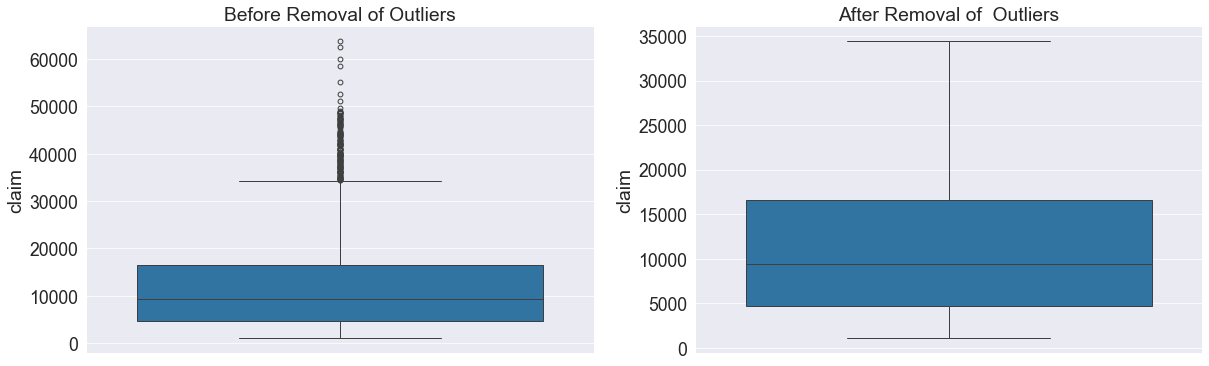

In [57]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
ax1.set_title('Before Removal of Outliers')
sns.boxplot(tmp_claim,ax=ax1);
ax2.set_title('After Removal of  Outliers');
sns.boxplot(df['claim'],ax=ax2);

### Bivariant EDA

### Catagorical Columns
- Gender
- diabetic
- Region
- smoker

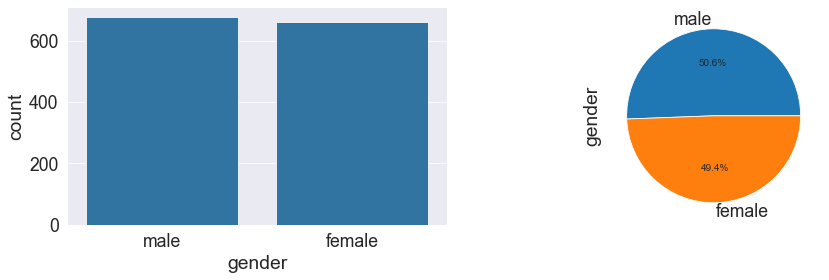

In [58]:
fig = plt.figure(figsize=(15,4))
(ax1,ax2) = fig.subplots(1,2)
sns.countplot(x=df['gender'],ax=ax1)
df['gender'].value_counts().plot(kind='pie',autopct='%0.1f%%',ax=ax2);

> ### Key Insights:

> 1. **Gender Balance:**
   - The dataset exhibits a nearly equal distribution between male and female categories, with a slight majority (50.6%) being > male.

> 2. **Implications:**
>   - This balanced gender representation may indicate a well-diversified dataset, potentially reducing the risk of gender 
> related biases in subsequent analyses.

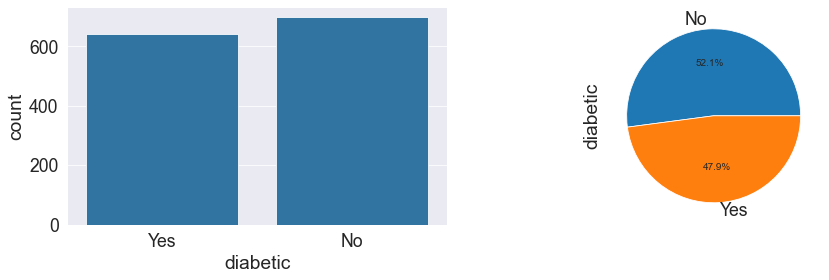

In [59]:
fig = plt.figure(figsize=(15,4))
(ax1,ax2) = fig.subplots(1,2)
sns.countplot(x=df['diabetic'],ax=ax1)
df['diabetic'].value_counts().plot(kind='pie',autopct='%0.1f%%',ax=ax2);

### 1. **Observations:**
  - ####  A significant proportion, accounting for 47.9% of individuals, report having diabetes.


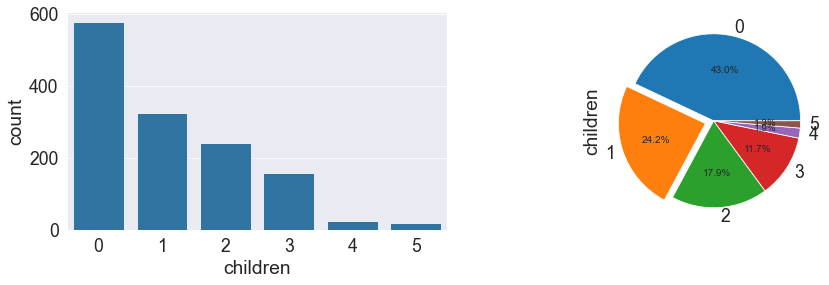

In [60]:
fig = plt.figure(figsize=(15,4))
(ax1,ax2) = fig.subplots(1,2)
sns.countplot(x=df['children'],ax=ax1)
df['children'].value_counts().plot(kind='pie',autopct='%0.1f%%',ax=ax2,explode=[0,0.1,0,0,0,0]);

### **Key Observations**
- Majority Without Children:
- A significant portion of individuals in the dataset (576) do not have any children.
- Diversity in Family Sizes:
- The dataset includes individuals with varying family sizes, ranging from one to five children.

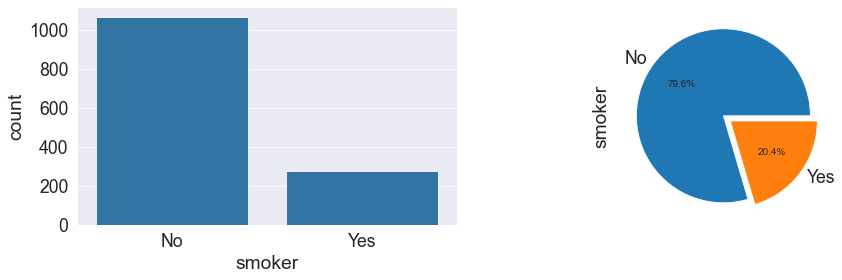

In [61]:
fig = plt.figure(figsize=(15,4))
(ax1,ax2) = fig.subplots(1,2)
sns.countplot(x=df['smoker'],ax=ax1)
df['smoker'].value_counts().plot(kind='pie',autopct='%0.1f%%',ax=ax2,explode=[0,0.1]);

### Observations

- #### The dataset reveals that approximately 20.6% of individuals identify as smokers.


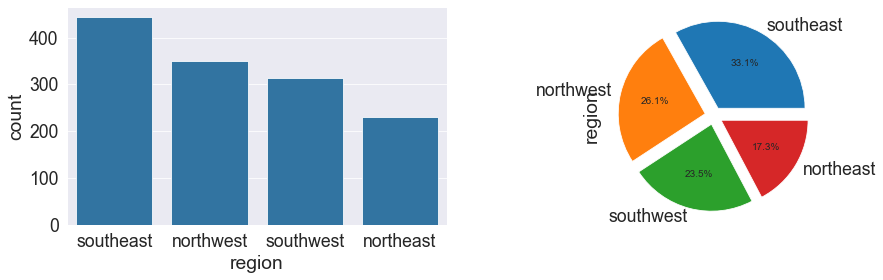

In [62]:
fig = plt.figure(figsize=(15,4))
(ax1,ax2) = fig.subplots(1,2)
sns.countplot(x=df['region'],ax=ax1)
df['region'].value_counts().plot(kind='pie',autopct='%0.1f%%',ax=ax2,explode=[0.1]*4);

### Key Observations

### High Representation in Southeast:

- The dataset has a notable concentration of individuals from the Southeast region, with 443 individuals.

### Balanced Distribution:

- While there is variation, the dataset maintains a reasonably balanced distribution across the Northwest, Southwest, and Northeast regions.

---


### Cat to Cat
- gender with diabetic
- gender with children
- gender with smoker
- gender with region
- bmi_cat with bloodpressure
- bloodpressure_cat with  claim

In [63]:
pd.crosstab(df['gender'],df['diabetic'])

diabetic   No  Yes
gender            
female    339  323
male      359  319

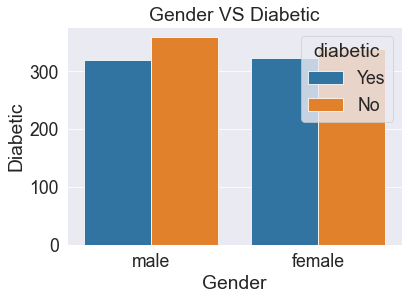

In [101]:
sns.countplot(x=df['gender'],hue=df['diabetic'])
plt.xlabel('Gender')
plt.ylabel('Diabetic')
plt.title('Gender VS Diabetic')
plt.show();

In [102]:
pd.crosstab(df['gender'],df['smoker'])

smoker   No  Yes
gender          
female  547  115
male    519  159

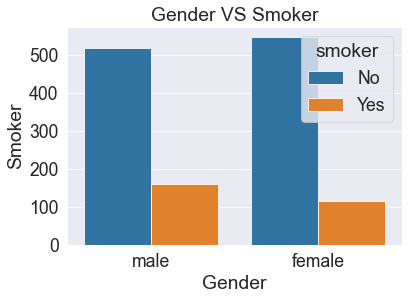

In [103]:
sns.countplot(x=df['gender'],hue=df['smoker'])
plt.xlabel('Gender')
plt.ylabel('Smoker')
plt.title('Gender VS Smoker')
plt.show();

In [104]:
pd.crosstab(df['gender'],df['region'])

region  northeast  northwest  southeast  southwest
gender                                            
female        112        164        224        162
male          119        185        219        152

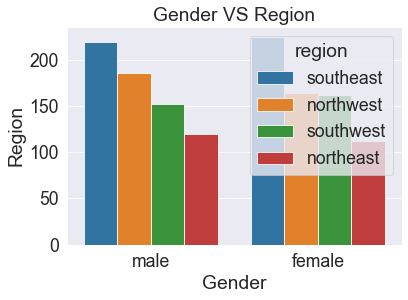

In [105]:
sns.countplot(x=df['gender'],hue=df['region'])
plt.xlabel('Gender')
plt.ylabel('Region')
plt.title('Gender VS Region')
plt.show();

In [106]:
pd.crosstab(df['gender'],cat_df['bloodpressure'])

bloodpressure  High  elevated  extremely high  fatal
gender                                              
female          249       235             129     49
male            249       234             127     68

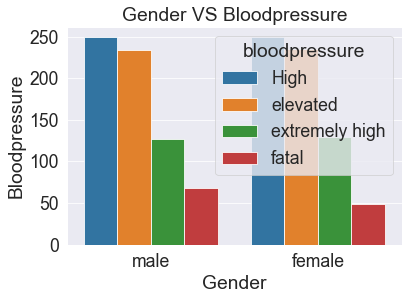

In [107]:
sns.countplot(x=df['gender'],hue=cat_df['bloodpressure'])
plt.xlabel('Gender')
plt.ylabel('Bloodpressure')
plt.title('Gender VS Bloodpressure')
plt.show();

In [108]:
pd.crosstab(df['gender'],cat_df['bmi'])

bmi     Healthy  Obese  Overweight  Underweight  Very Obese
gender                                                     
female      114    293         191           12          52
male        106    322         186            8          56

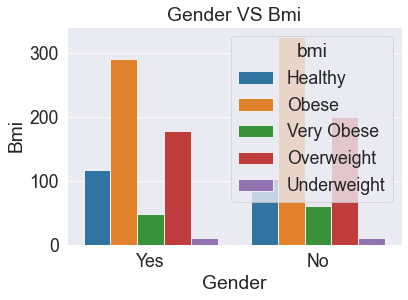

In [109]:
sns.countplot(x=df['diabetic'],hue=cat_df['bmi'])
plt.xlabel('Gender')
plt.ylabel('Bmi')
plt.title('Gender VS Bmi')
plt.show()

In [110]:
pd.crosstab(df['diabetic'],df['smoker'])

smoker     No  Yes
diabetic          
No        560  138
Yes       506  136

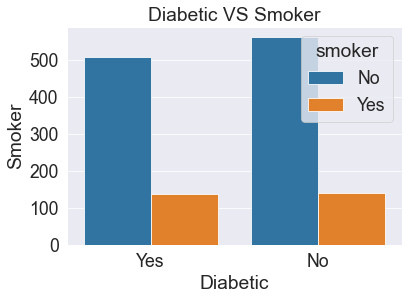

In [111]:
sns.countplot(x=df['diabetic'],hue=df['smoker'])
plt.xlabel('Diabetic')
plt.ylabel('Smoker')
plt.title('Diabetic VS Smoker')
plt.show();

In [75]:
pd.crosstab(df['diabetic'],df['children'])

children    0    1    2   3   4   5
diabetic                           
No        292  179  120  83  13  11
Yes       284  145  120  74  12   7

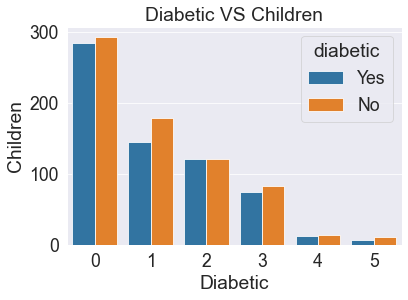

In [76]:
sns.countplot(hue=df['diabetic'],x=df['children'])
plt.xlabel('Diabetic')
plt.ylabel('Children')
plt.title('Diabetic VS Children')
plt.show()

In [77]:
pd.crosstab(df['diabetic'],df['region'])

region    northeast  northwest  southeast  southwest
diabetic                                            
No              110        192        225        170
Yes             121        157        218        144

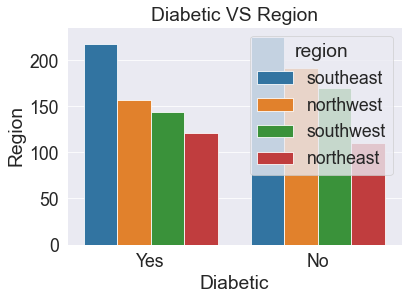

In [78]:
sns.countplot(x=df['diabetic'],hue=df['region'])
plt.xlabel('Diabetic')
plt.ylabel('Region')
plt.title('Diabetic VS Region')
plt.show()

In [79]:
pd.crosstab(df['diabetic'],cat_df['bloodpressure'])

bloodpressure  High  elevated  extremely high  fatal
diabetic                                            
No              282       231             125     60
Yes             216       238             131     57

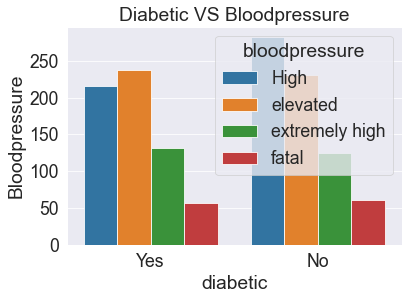

In [80]:
sns.countplot(x=df['diabetic'],hue=cat_df['bloodpressure'])
plt.xlabel('diabetic')
plt.ylabel('Bloodpressure')
plt.title('Diabetic VS Bloodpressure')
plt.show()

In [81]:
pd.crosstab(df['diabetic'],cat_df['bmi'])

bmi       Healthy  Obese  Overweight  Underweight  Very Obese
diabetic                                                     
No            103    324         200           10          61
Yes           117    291         177           10          47

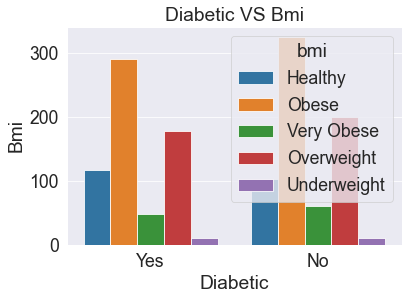

In [113]:
sns.countplot(x=df['diabetic'],hue=cat_df['bmi'])
plt.xlabel('Diabetic')
plt.ylabel('Bmi')
plt.title('Diabetic VS Bmi')
plt.show()

In [114]:
pd.crosstab(df['smoker'],df['children'])

children    0    1    2    3   4   5
smoker                              
No        461  263  185  118  22  17
Yes       115   61   55   39   3   1

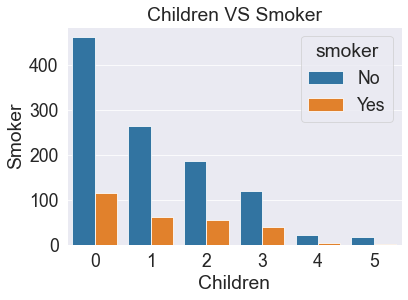

In [115]:
sns.countplot(hue=df['smoker'],x=df['children'])
plt.xlabel('Children')
plt.ylabel('Smoker')
plt.title('Children VS Smoker')
plt.show();

In [116]:
pd.crosstab(df['region'],df['smoker'])

smoker      No  Yes
region             
northeast  164   67
northwest  291   58
southeast  352   91
southwest  256   58

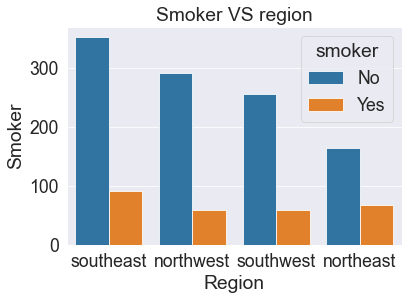

In [117]:
sns.countplot(hue=df['smoker'],x=df['region'])
plt.xlabel('Region')
plt.ylabel('Smoker')
plt.title('Smoker VS region')
plt.show()

In [118]:
pd.crosstab(df['smoker'],cat_df['bloodpressure'])

bloodpressure  High  elevated  extremely high  fatal
smoker                                              
No              437       411             159     59
Yes              61        58              97     58

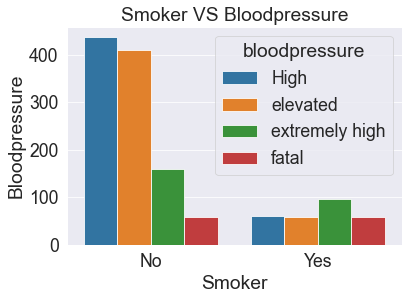

In [119]:
sns.countplot(x=df['smoker'],hue=cat_df['bloodpressure'])
plt.xlabel('Smoker')
plt.ylabel('Bloodpressure')
plt.title('Smoker VS Bloodpressure')
plt.show()

In [120]:
pd.crosstab(df['smoker'],cat_df['bmi'])

bmi     Healthy  Obese  Overweight  Underweight  Very Obese
smoker                                                     
No          171    491         305           15          84
Yes          49    124          72            5          24

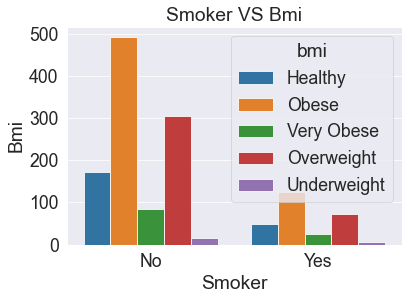

In [121]:
sns.countplot(x=df['smoker'],hue=cat_df['bmi'])
plt.xlabel('Smoker')
plt.ylabel('Bmi')
plt.title('Smoker VS Bmi')
plt.show()

### Catagorical and Numerical Columns

- gender with bmi
- gender with bloodpressure
- gender with claim
- diabetic with bmi
- diabetic with bloodpressure
- diabetic with claim
- smoker with bmi
- smoker with bloodpressure
- smoker with claim
- region with bmi
- region with bloodpressure
- region with claim
- cat_bmi with claim
- cat_bloodpressure with claim

In [123]:
sns.set_context('paper', font_scale = 2.3)

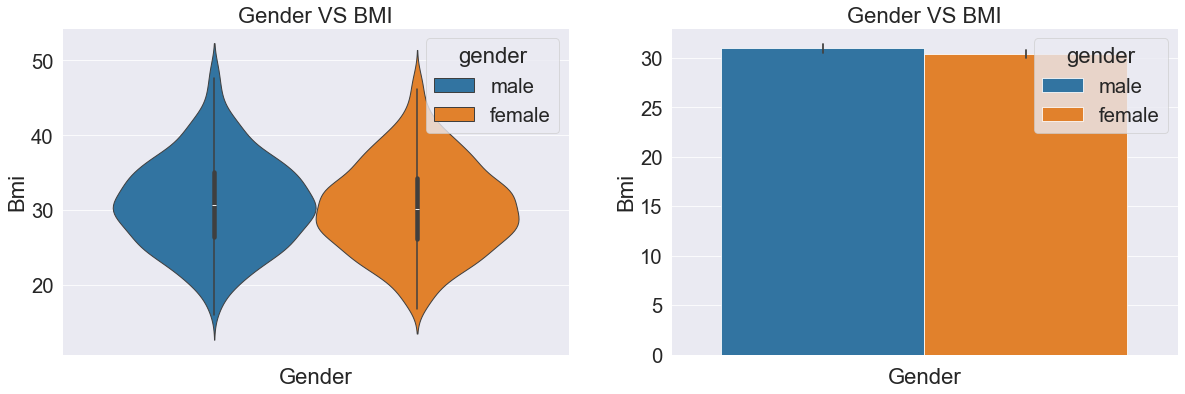

In [124]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(hue=df['gender'],y=df['bmi'],ax=ax1)
ax1.set_xlabel('Gender')
ax1.set_ylabel('Bmi')
ax1.set_title('Gender VS BMI')

sns.barplot(hue=df['gender'],y=df['bmi'],ax=ax2)
ax2.set_xlabel('Gender')
ax2.set_ylabel('Bmi')
ax2.set_title('Gender VS BMI');

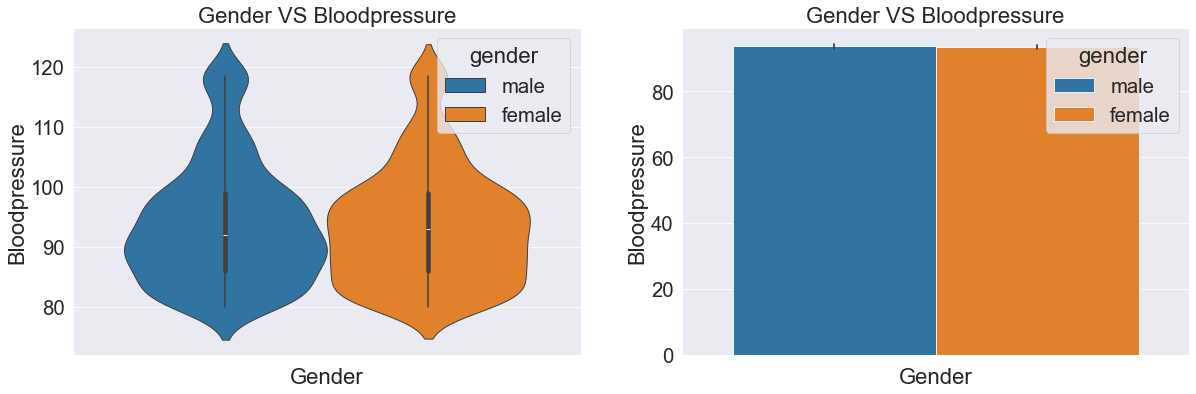

In [125]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(hue=df['gender'],y=df['bloodpressure'],ax=ax1)
ax1.set_xlabel('Gender')
ax1.set_ylabel('Bloodpressure')
ax1.set_title('Gender VS Bloodpressure')

sns.barplot(hue=df['gender'],y=df['bloodpressure'],ax=ax2)
ax2.set_xlabel('Gender')
ax2.set_ylabel('Bloodpressure')
ax2.set_title('Gender VS Bloodpressure');

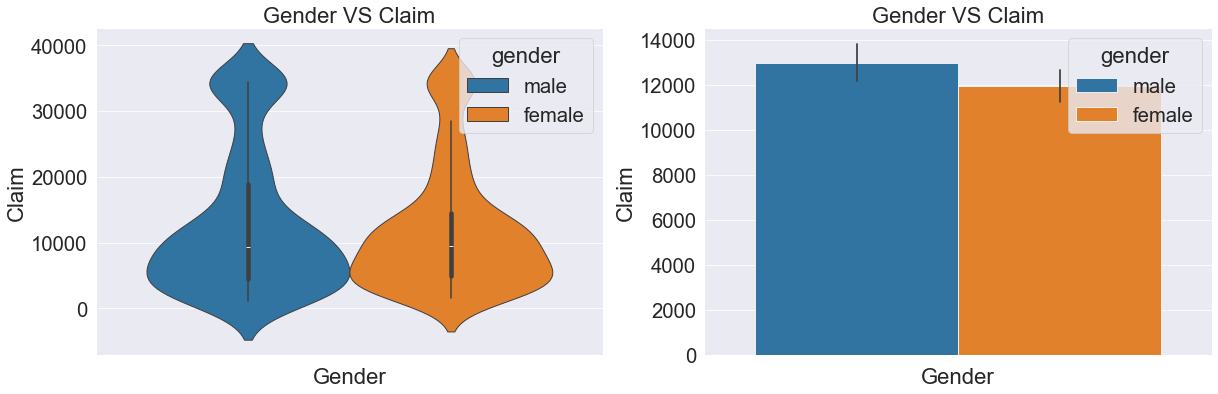

In [126]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(hue=df['gender'],y=df['claim'],ax=ax1)
ax1.set_xlabel('Gender')
ax1.set_ylabel('Claim')
ax1.set_title('Gender VS Claim')

sns.barplot(hue=df['gender'],y=df['claim'],ax=ax2)
ax2.set_xlabel('Gender')
ax2.set_ylabel('Claim')
ax2.set_title('Gender VS Claim');

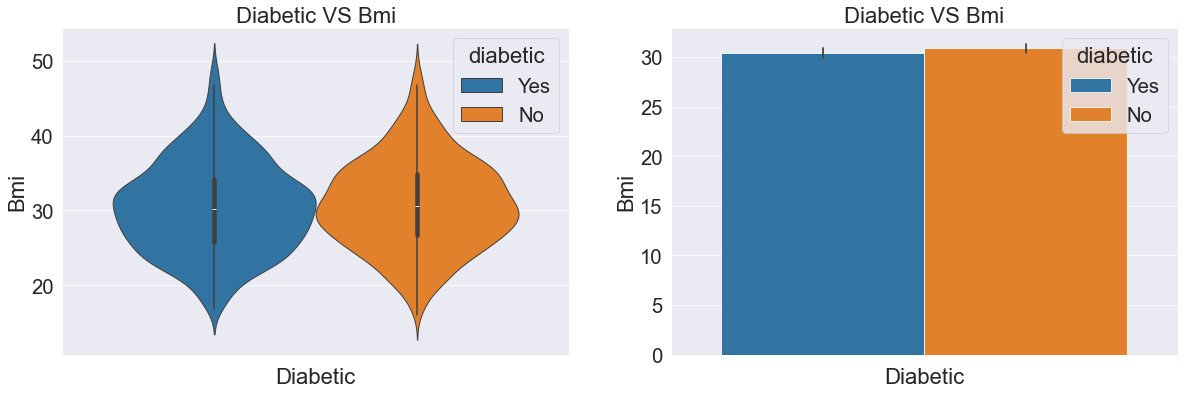

In [127]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(hue=df['diabetic'],y=df['bmi'],ax=ax1)
ax1.set_xlabel('Diabetic')
ax1.set_ylabel('Bmi')
ax1.set_title('Diabetic VS Bmi')

sns.barplot(hue=df['diabetic'],y=df['bmi'],ax=ax2)
ax2.set_xlabel('Diabetic')
ax2.set_ylabel('Bmi')
ax2.set_title('Diabetic VS Bmi');

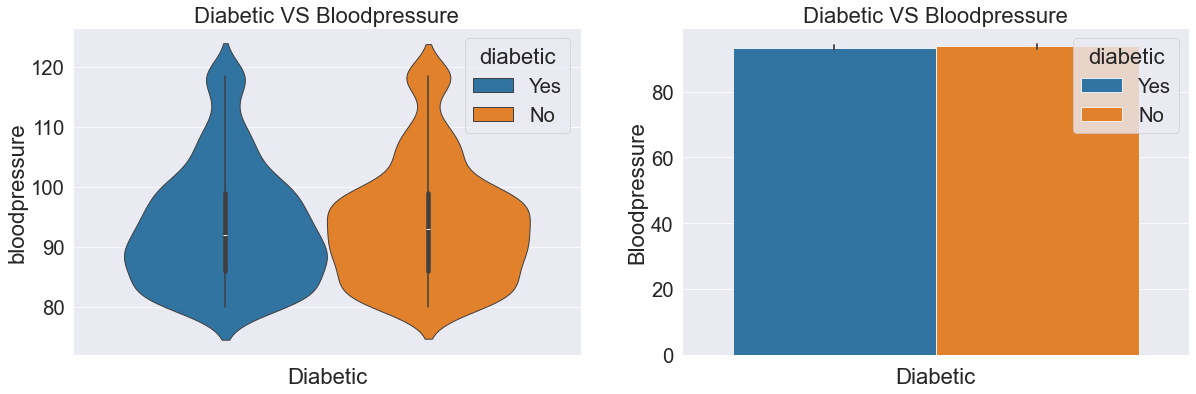

In [128]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(hue=df['diabetic'],y=df['bloodpressure'],ax=ax1)
ax1.set_xlabel('Diabetic')
ax1.set_ylabel('bloodpressure')
ax1.set_title('Diabetic VS Bloodpressure')
sns.barplot(hue=df['diabetic'],y=df['bloodpressure'],ax=ax2)
ax2.set_xlabel('Diabetic')
ax2.set_ylabel('Bloodpressure')
ax2.set_title('Diabetic VS Bloodpressure');

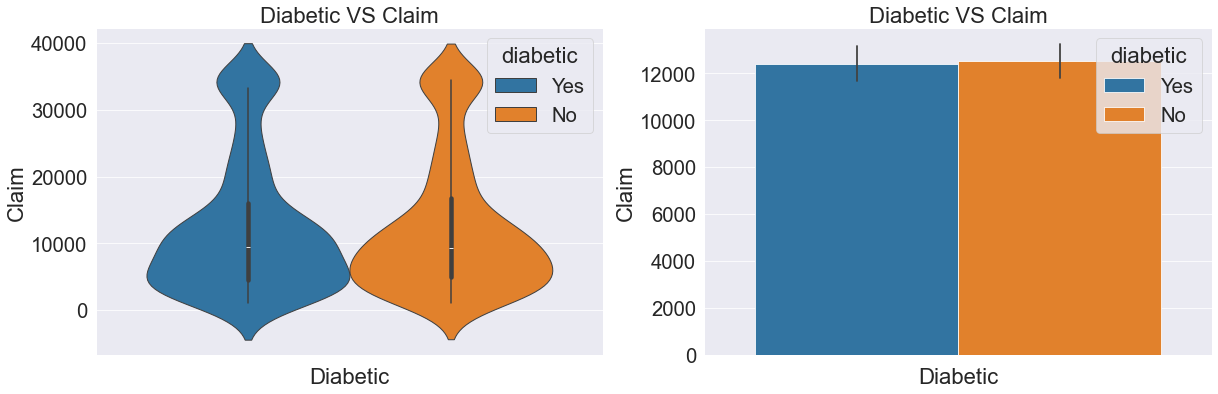

In [129]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(hue=df['diabetic'],y=df['claim'],ax=ax1)
ax1.set_xlabel('Diabetic')
ax1.set_ylabel('Claim')
ax1.set_title('Diabetic VS Claim')
sns.barplot(hue=df['diabetic'],y=df['claim'],ax=ax2)
ax2.set_xlabel('Diabetic')
ax2.set_ylabel('Claim')
ax2.set_title('Diabetic VS Claim');

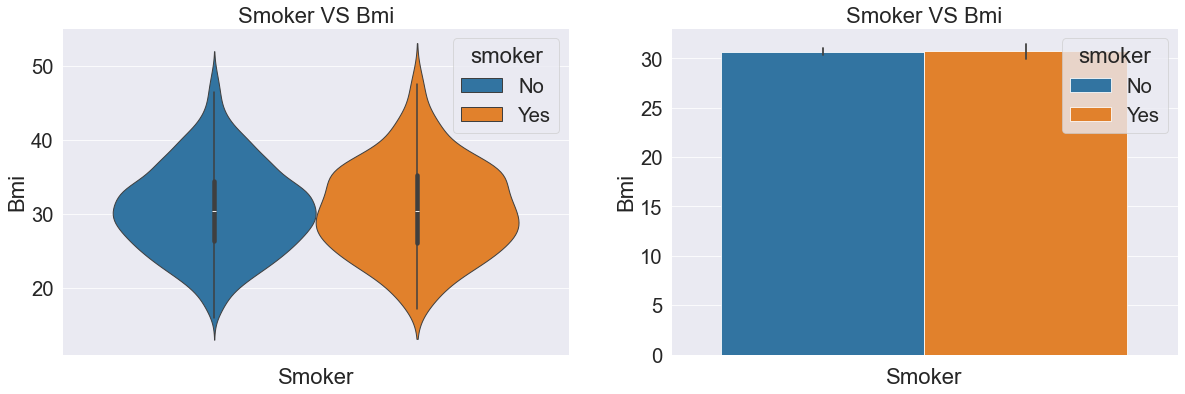

In [130]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(hue=df['smoker'],y=df['bmi'],ax=ax1)
ax1.set_xlabel('Smoker')
ax1.set_ylabel('Bmi')
ax1.set_title('Smoker VS Bmi')
sns.barplot(hue=df['smoker'],y=df['bmi'],ax=ax2)
ax2.set_xlabel('Smoker')
ax2.set_ylabel('Bmi')
ax2.set_title('Smoker VS Bmi');

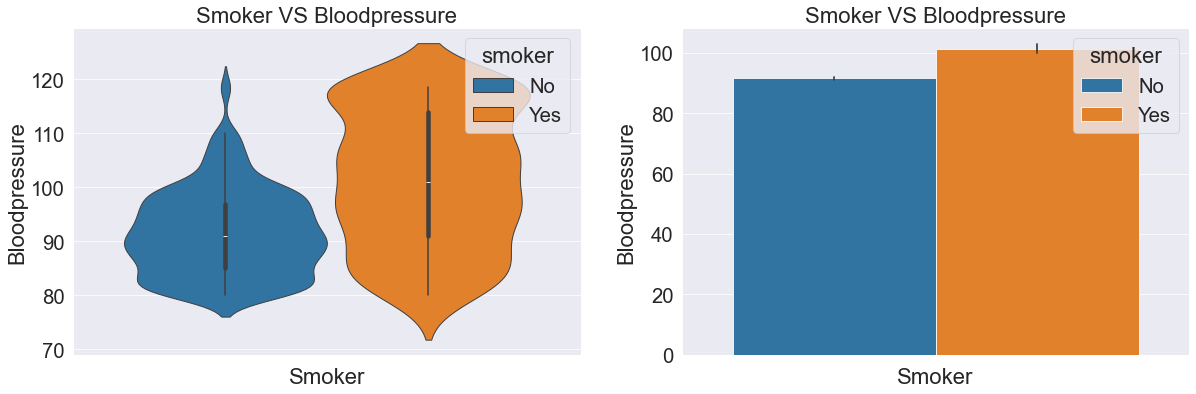

In [131]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(hue=df['smoker'],y=df['bloodpressure'],ax=ax1)
ax1.set_xlabel('Smoker')
ax1.set_ylabel('Bloodpressure')
ax1.set_title('Smoker VS Bloodpressure')
sns.barplot(hue=df['smoker'],y=df['bloodpressure'],ax=ax2)
ax2.set_xlabel('Smoker')
ax2.set_ylabel('Bloodpressure')
ax2.set_title('Smoker VS Bloodpressure');

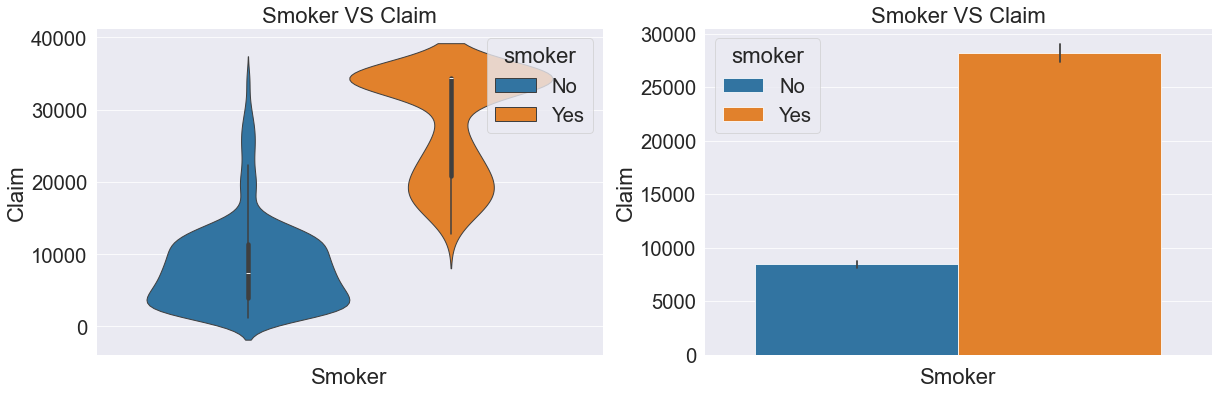

In [132]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(hue=df['smoker'],y=df['claim'],ax=ax1)
ax1.set_xlabel('Smoker')
ax1.set_ylabel('Claim')
ax1.set_title('Smoker VS Claim')
sns.barplot(hue=df['smoker'],y=df['claim'],ax=ax2)
ax2.set_xlabel('Smoker')
ax2.set_ylabel('Claim')
ax2.set_title('Smoker VS Claim');

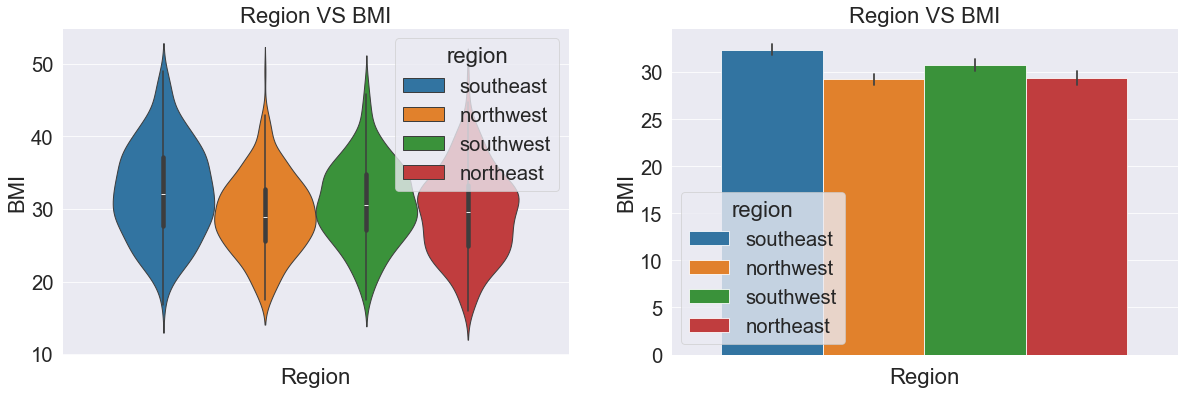

In [133]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(hue=df['region'],y=df['bmi'],ax=ax1)
ax1.set_xlabel('Region')
ax1.set_ylabel('BMI')
ax1.set_title('Region VS BMI')
sns.barplot(hue=df['region'],y=df['bmi'],ax=ax2)
ax2.set_xlabel('Region')
ax2.set_ylabel('BMI')
ax2.set_title('Region VS BMI');

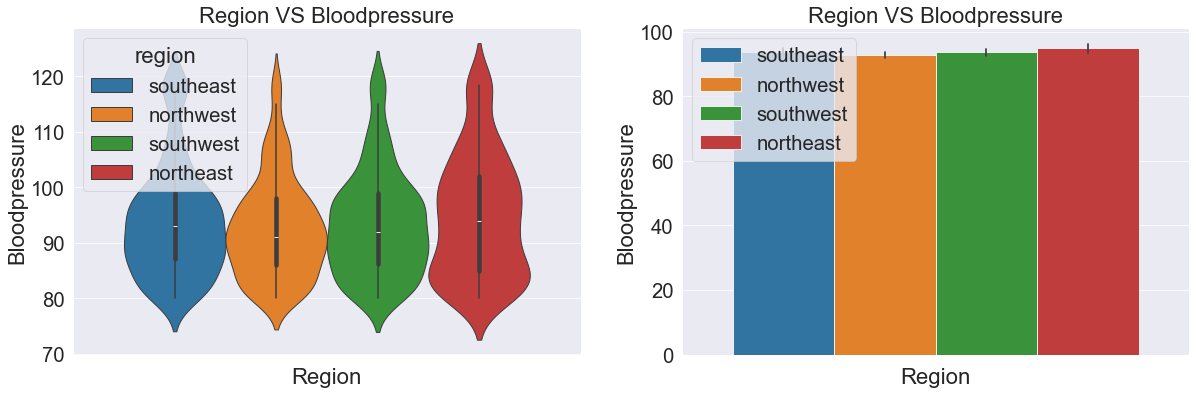

In [134]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(hue=df['region'],y=df['bloodpressure'],ax=ax1)
ax1.set_xlabel('Region')
ax1.set_ylabel('Bloodpressure')
ax1.set_title('Region VS Bloodpressure')
sns.barplot(hue=df['region'],y=df['bloodpressure'],ax=ax2)
ax2.set_xlabel('Region')
ax2.set_ylabel('Bloodpressure')
ax2.set_title('Region VS Bloodpressure');
plt.legend(loc='upper left');

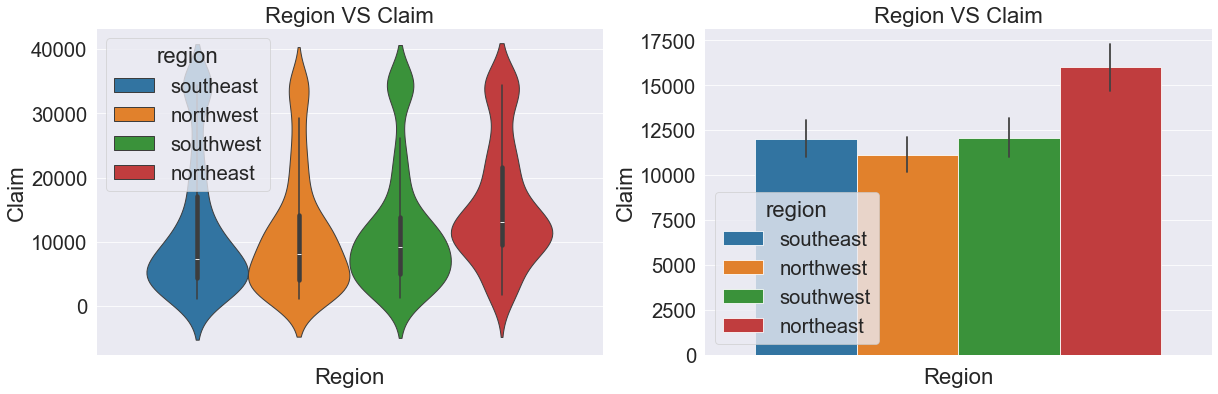

In [135]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(hue=df['region'],y=df['claim'],ax=ax1)
ax1.set_xlabel('Region')
ax1.set_ylabel('Claim')
ax1.set_title('Region VS Claim')
sns.barplot(hue=df['region'],y=df['claim'],ax=ax2)
ax2.set_xlabel('Region')
ax2.set_ylabel('Claim')
ax2.set_title('Region VS Claim');

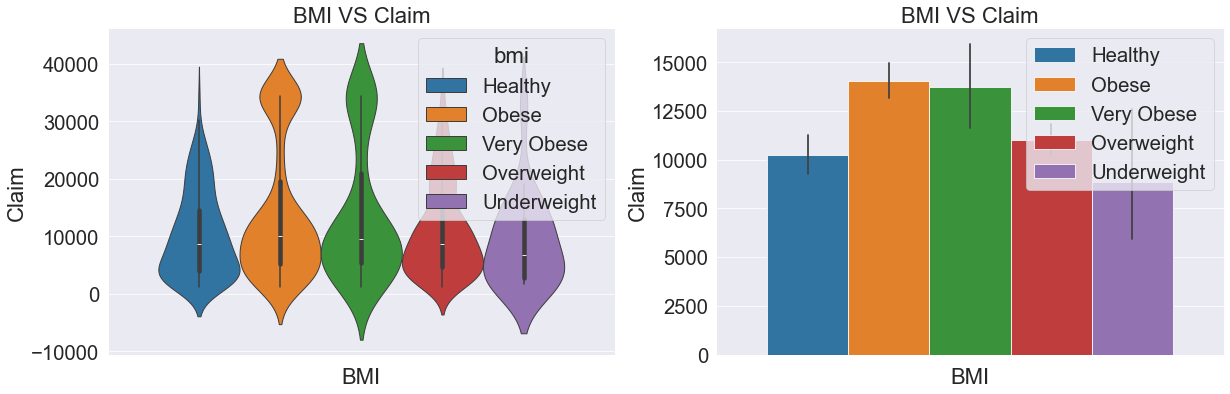

In [136]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(hue=cat_df['bmi'],y=df['claim'],ax=ax1)
ax1.set_xlabel('BMI')
ax1.set_ylabel('Claim')
ax1.set_title('BMI VS Claim')
sns.barplot(hue=cat_df['bmi'],y=df['claim'],ax=ax2)
plt.legend(loc='upper right')
ax2.set_xlabel('BMI')
ax2.set_ylabel('Claim')
ax2.set_title('BMI VS Claim');

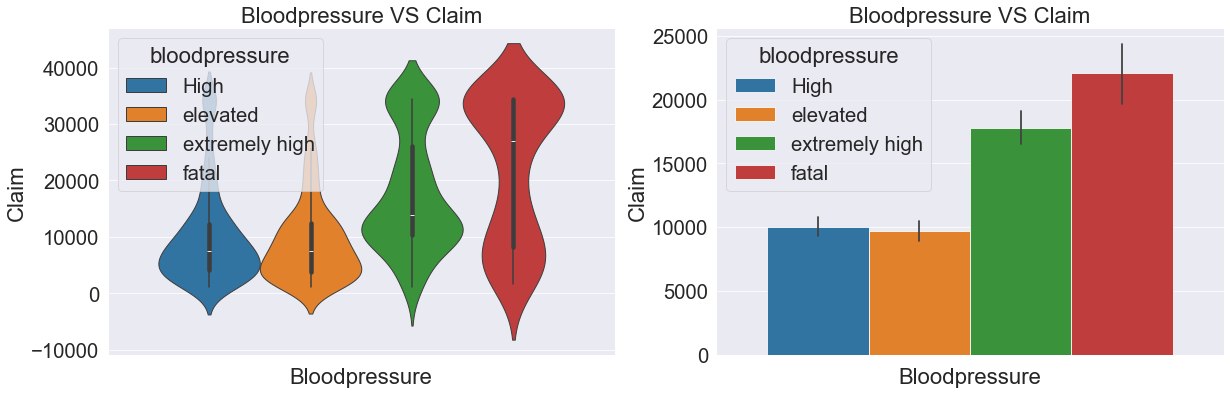

In [137]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(hue=cat_df['bloodpressure'],y=df['claim'],ax=ax1)
ax1.set_xlabel('Bloodpressure')
ax1.set_ylabel('Claim')
ax1.set_title('Bloodpressure VS Claim')

sns.barplot(hue=cat_df['bloodpressure'],y=df['claim'],ax=ax2)
ax2.set_xlabel('Bloodpressure')
ax2.set_ylabel('Claim')
ax2.set_title('Bloodpressure VS Claim');

# Num to Num
- Age with bmi
- Age with bloodpressure
- Age with claim
- bmi with claim
- bmi with bloodpressure
- bloodpressure with  claim



## Age Vs BloodPressure  Age Vs BMI 

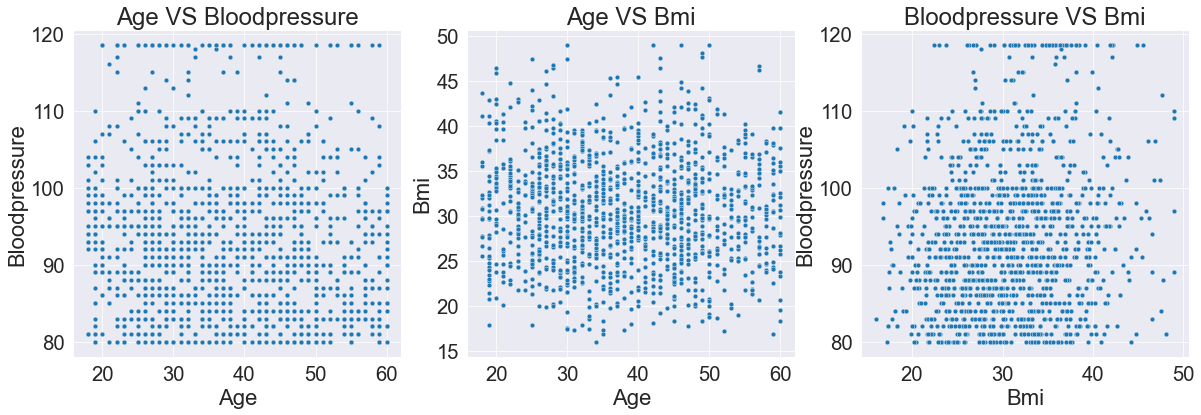

In [138]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2,ax3) = fig.subplots(1,3)
sns.scatterplot(x=df['age'],y=df['bloodpressure'],ax=ax1);
ax1.set_xlabel('Age')
ax1.set_ylabel('Bloodpressure')
ax1.set_title('Age VS Bloodpressure', fontsize=24, loc='center')

sns.scatterplot(x=df['age'],y=df['bmi'],ax=ax2);
ax2.set_xlabel('Age')
ax2.set_ylabel('Bmi')
ax2.set_title('Age VS Bmi', fontsize=24, loc='center')

sns.scatterplot(x=df['bmi'],y=df['bloodpressure']);
ax3.set_xlabel('Bmi')
ax3.set_ylabel('Bloodpressure')
ax3.set_title('Bloodpressure VS Bmi', fontsize=24, loc='center');

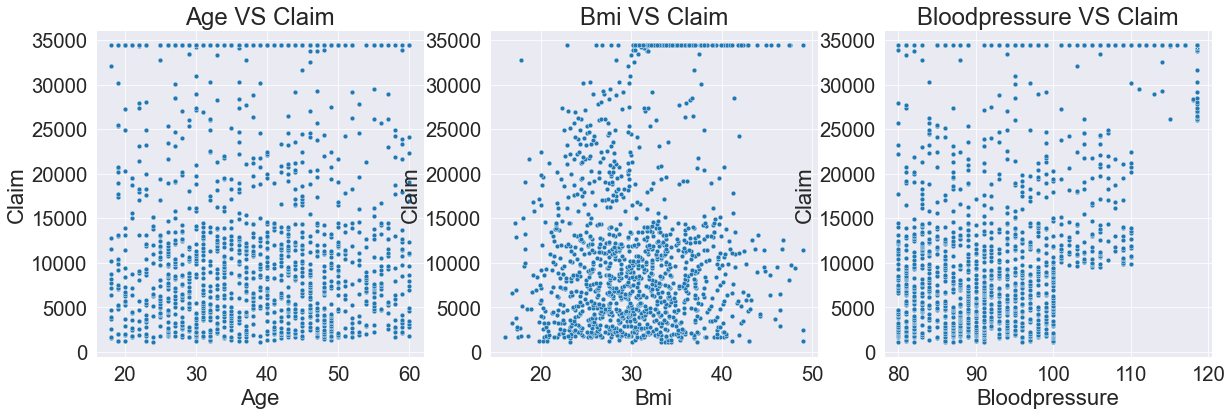

In [139]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2,ax3) = fig.subplots(1,3)
sns.scatterplot(x=df['age'],y=df['claim'],ax=ax1)
ax1.set_xlabel('Age')
ax1.set_ylabel('Claim')
ax1.set_title('Age VS Claim', fontsize=24, loc='center');

sns.scatterplot(x=df['bmi'],y=df['claim'],ax=ax2);
ax2.set_xlabel('Bmi')
ax2.set_ylabel('Claim')
ax2.set_title('Bmi VS Claim', fontsize=24, loc='center');

sns.scatterplot(x=df['bloodpressure'],y=df['claim'],ax=ax3);
ax3.set_xlabel('Bloodpressure')
ax3.set_ylabel('Claim')
ax3.set_title('Bloodpressure VS Claim', fontsize=24, loc='center');



In [140]:
df[num_cols].corr()

age       bmi  bloodpressure  children     claim
age            1.000000 -0.042350      -0.071450 -0.025547 -0.029839
bmi           -0.042350  1.000000       0.141027  0.012655  0.159282
bloodpressure -0.071450  0.141027       1.000000 -0.029573  0.507597
children      -0.025547  0.012655      -0.029573  1.000000  0.074492
claim         -0.029839  0.159282       0.507597  0.074492  1.000000

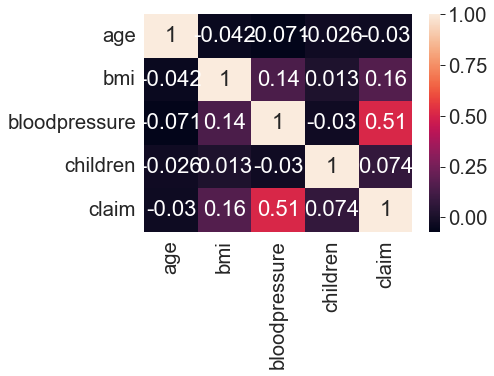

In [141]:
sns.heatmap(df[num_cols].corr(), annot=True);

### Multivariate Data Anaysis

### Cat to Cat
- gender with diabetic with smoker
- gender with children with smoker
- gender with region with smoker
- bmi_cat with diabetic with smoker
- bmi_cat with children with smoker
- bmi_cat with region with smoker
- blood_ptressure_cat with diabetic with smoker
- blood_ptressure_cat with children with smoker
- blood_ptressure_cat with region with smoker




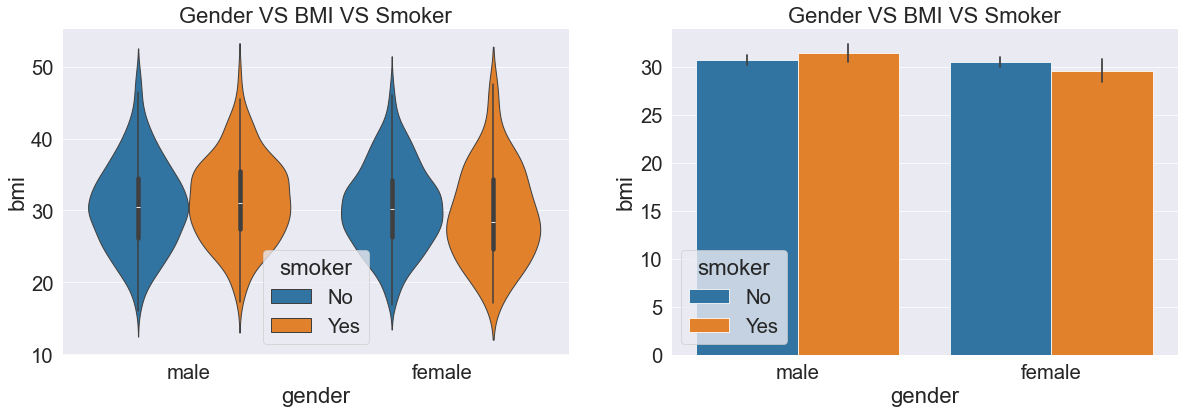

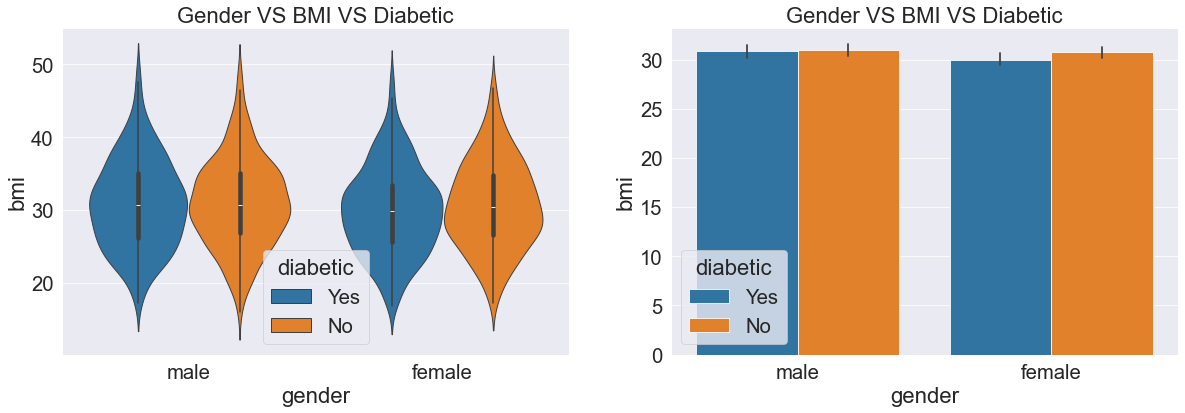

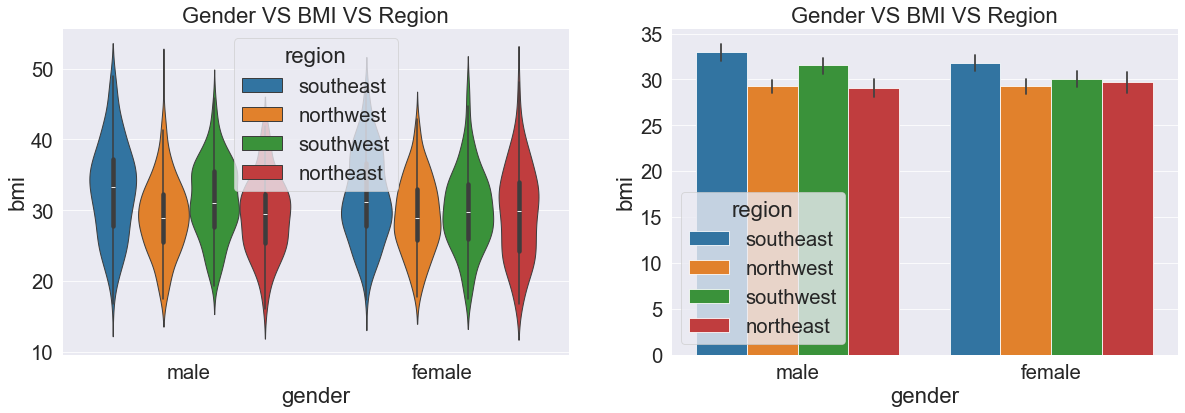

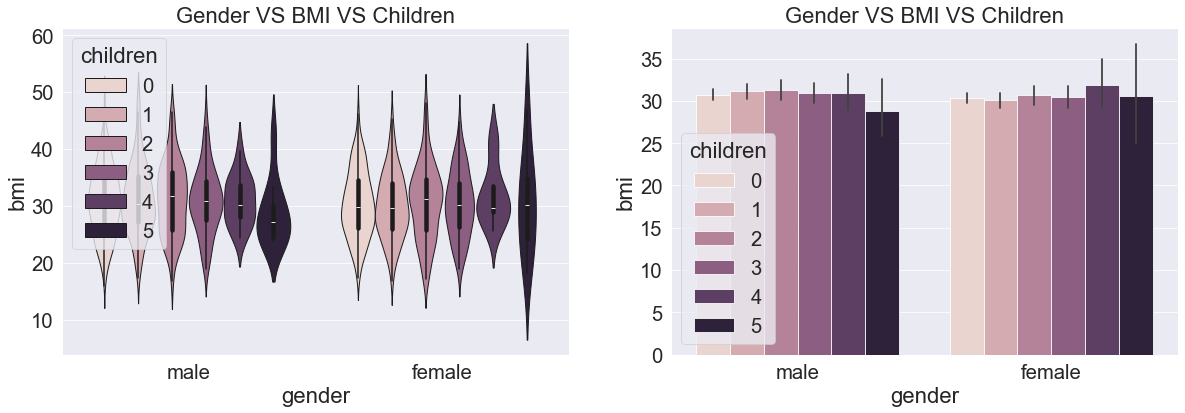

In [142]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bmi'],hue=df['smoker'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bmi'],hue=df['smoker'],ax=ax2)
ax1.set_title('Gender VS BMI VS Smoker')
ax2.set_title('Gender VS BMI VS Smoker')

fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bmi'],hue=df['diabetic'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bmi'],hue=df['diabetic'],ax=ax2)
ax1.set_title('Gender VS BMI VS Diabetic')
ax2.set_title('Gender VS BMI VS Diabetic')

fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bmi'],hue=df['region'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bmi'],hue=df['region'],ax=ax2)
ax1.set_title('Gender VS BMI VS Region')
ax2.set_title('Gender VS BMI VS Region')


fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bmi'],hue=df['children'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bmi'],hue=df['children'],ax=ax2)
ax1.set_title('Gender VS BMI VS Children')
ax2.set_title('Gender VS BMI VS Children');

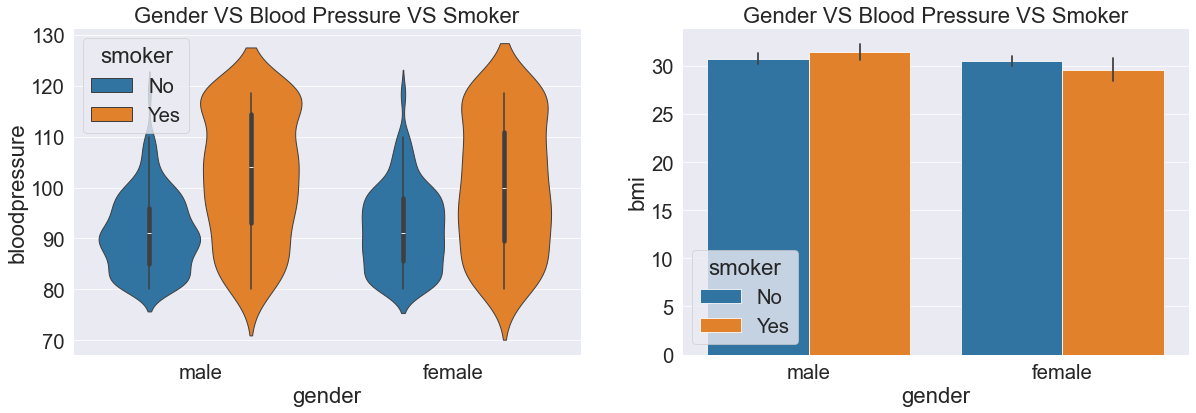

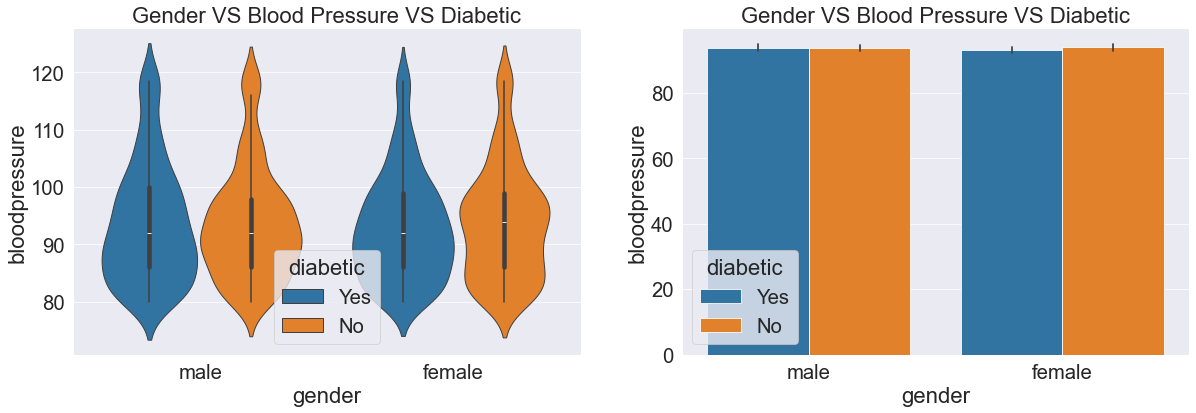

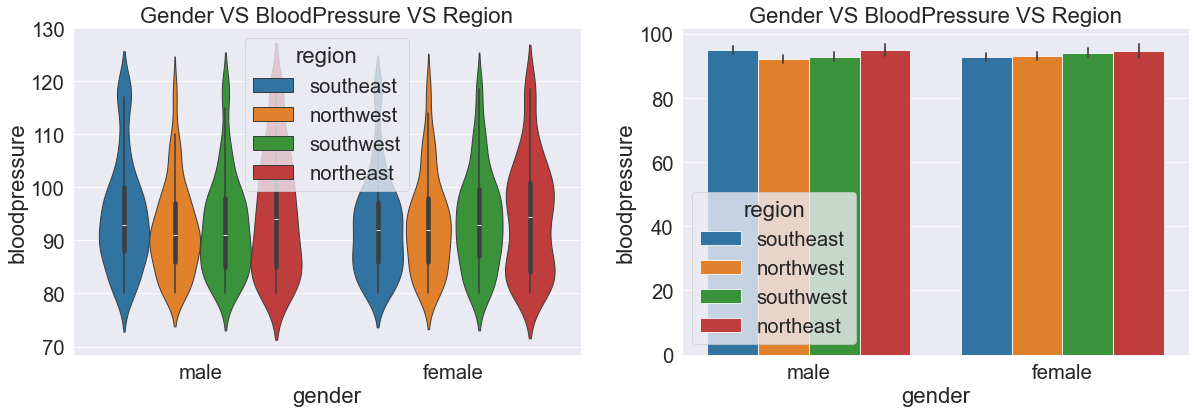

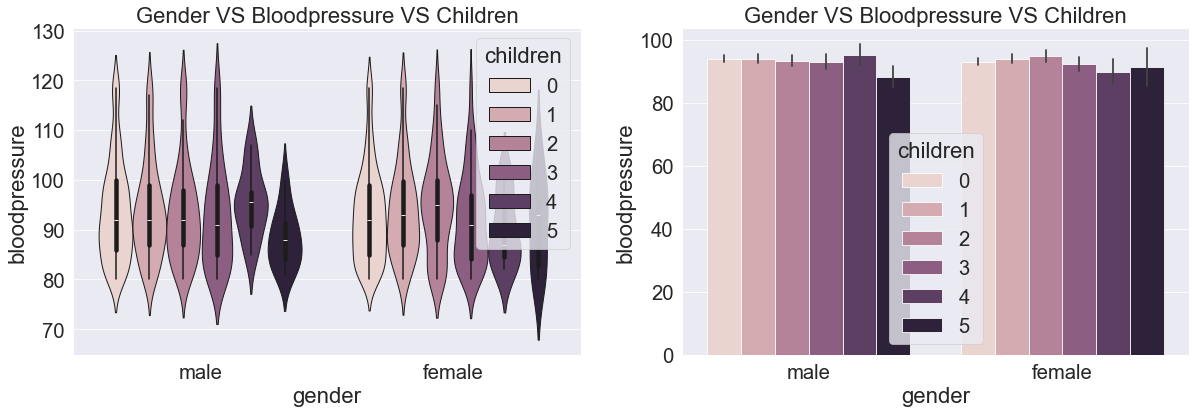

In [143]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bloodpressure'],hue=df['smoker'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bmi'],hue=df['smoker'],ax=ax2)
ax1.set_title('Gender VS Blood Pressure VS Smoker')
ax2.set_title('Gender VS Blood Pressure VS Smoker')

fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bloodpressure'],hue=df['diabetic'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bloodpressure'],hue=df['diabetic'],ax=ax2)
ax1.set_title('Gender VS Blood Pressure VS Diabetic')
ax2.set_title('Gender VS Blood Pressure VS Diabetic')

fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bloodpressure'],hue=df['region'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bloodpressure'],hue=df['region'],ax=ax2)
ax1.set_title('Gender VS BloodPressure VS Region')
ax2.set_title('Gender VS BloodPressure VS Region')

fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bloodpressure'],hue=df['children'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bloodpressure'],hue=df['children'],ax=ax2)
ax1.set_title('Gender VS Bloodpressure VS Children')
ax2.set_title('Gender VS Bloodpressure VS Children');

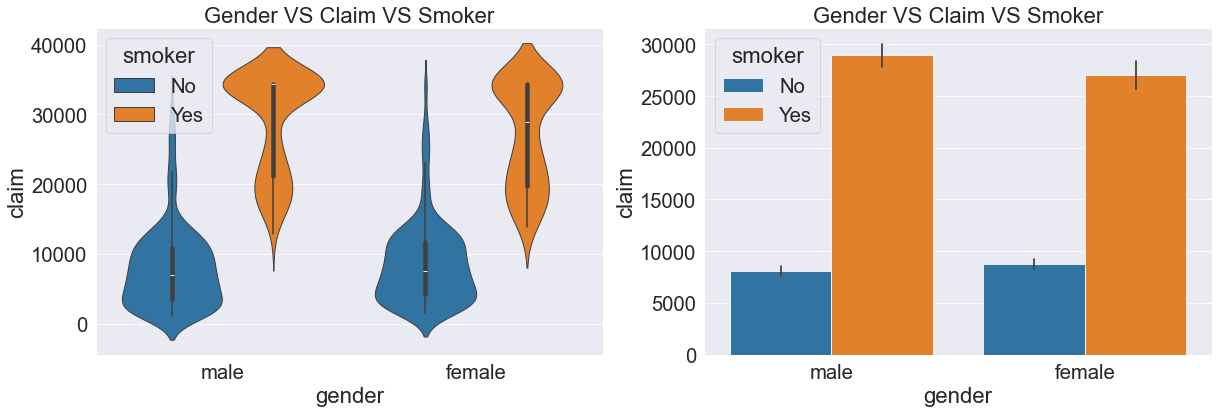

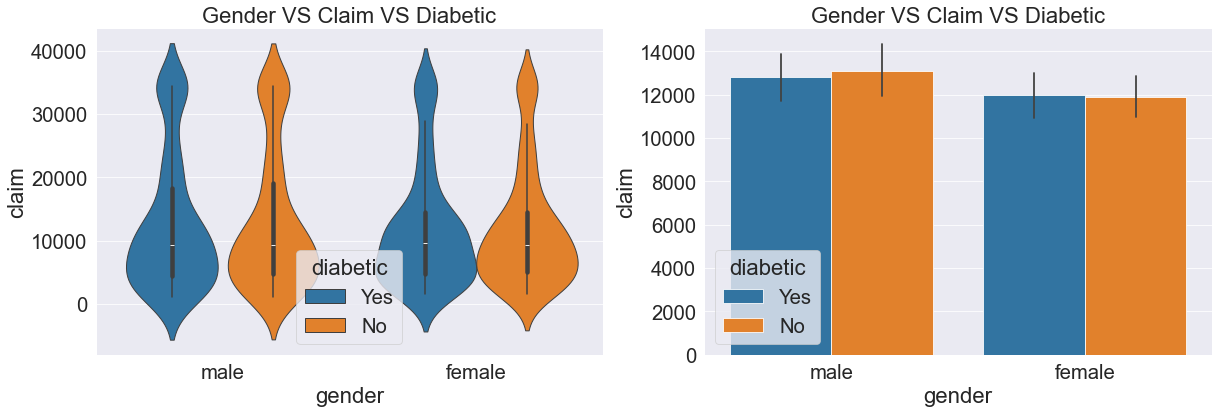

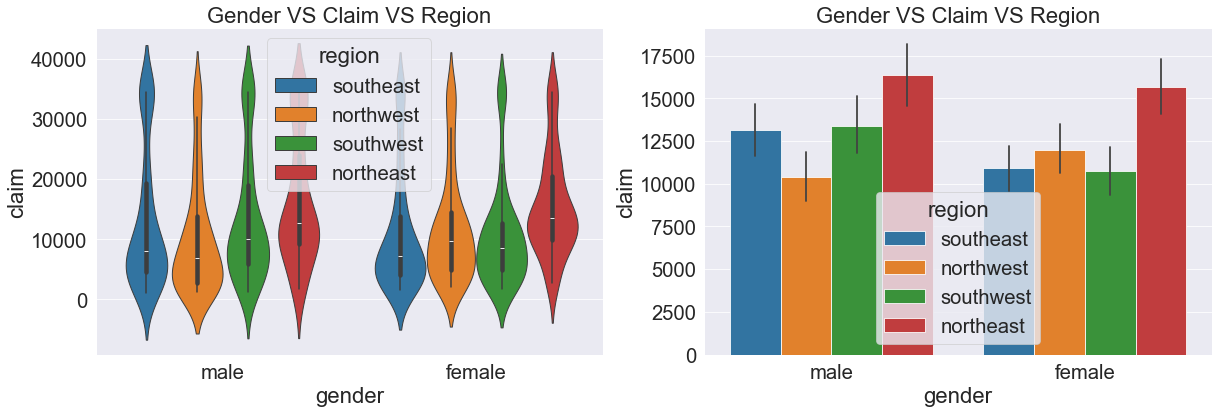

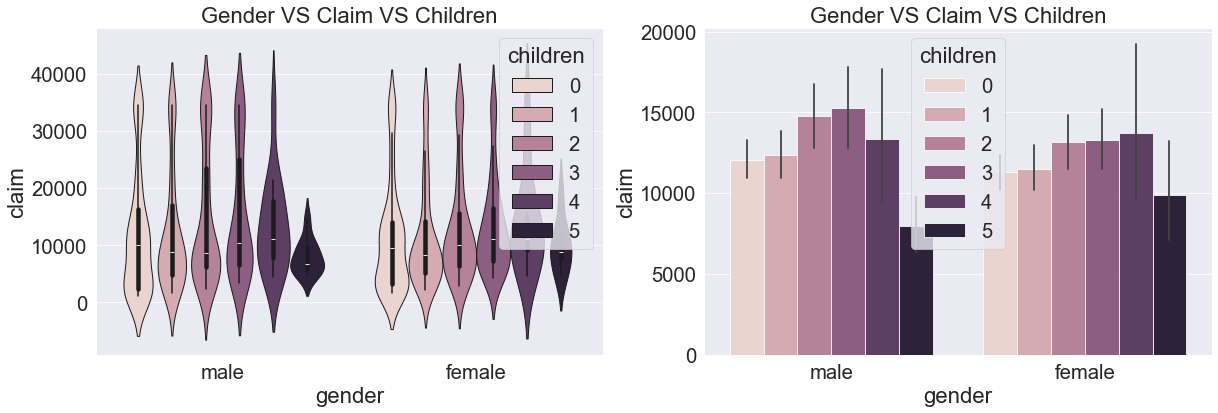

In [144]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['claim'],hue=df['smoker'],ax=ax1)
sns.barplot(x=df['gender'],y=df['claim'],hue=df['smoker'],ax=ax2)
ax1.set_title('Gender VS Claim VS Smoker')
ax2.set_title('Gender VS Claim VS Smoker')

fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['claim'],hue=df['diabetic'],ax=ax1)
sns.barplot(x=df['gender'],y=df['claim'],hue=df['diabetic'],ax=ax2)
ax1.set_title('Gender VS Claim VS Diabetic')
ax2.set_title('Gender VS Claim VS Diabetic')

fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['claim'],hue=df['region'],ax=ax1)
sns.barplot(x=df['gender'],y=df['claim'],hue=df['region'],ax=ax2)
ax1.set_title('Gender VS Claim VS Region')
ax2.set_title('Gender VS Claim VS Region')

fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['claim'],hue=df['children'],ax=ax1)
sns.barplot(x=df['gender'],y=df['claim'],hue=df['children'],ax=ax2)
ax1.set_title('Gender VS Claim VS Children')
ax2.set_title('Gender VS Claim VS Children');

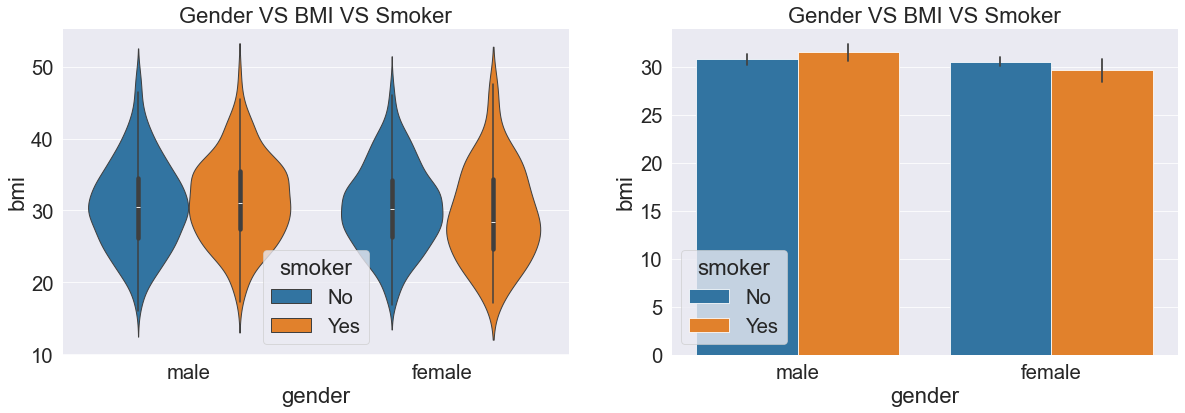

In [145]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bmi'],hue=df['smoker'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bmi'],hue=df['smoker'],ax=ax2)
ax1.set_title('Gender VS BMI VS Smoker')
ax2.set_title('Gender VS BMI VS Smoker');

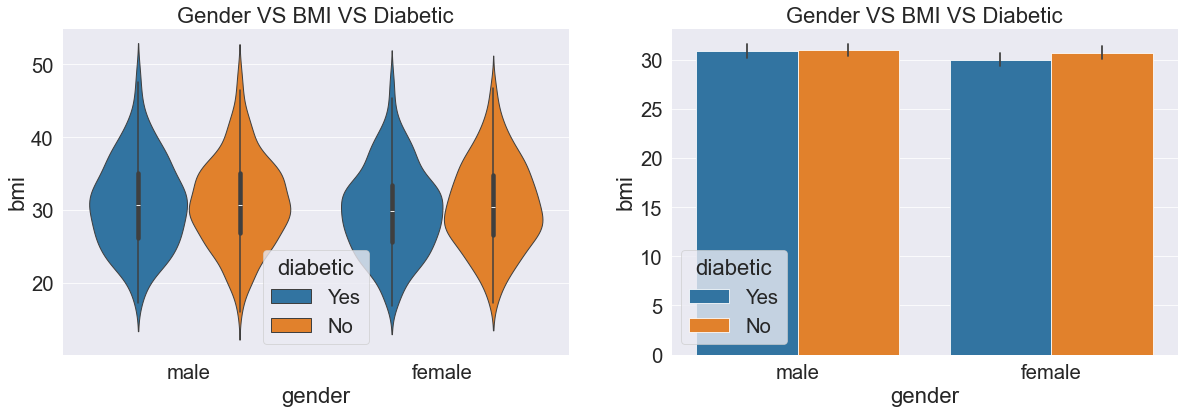

In [146]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bmi'],hue=df['diabetic'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bmi'],hue=df['diabetic'],ax=ax2)
ax1.set_title('Gender VS BMI VS Diabetic')
ax2.set_title('Gender VS BMI VS Diabetic');

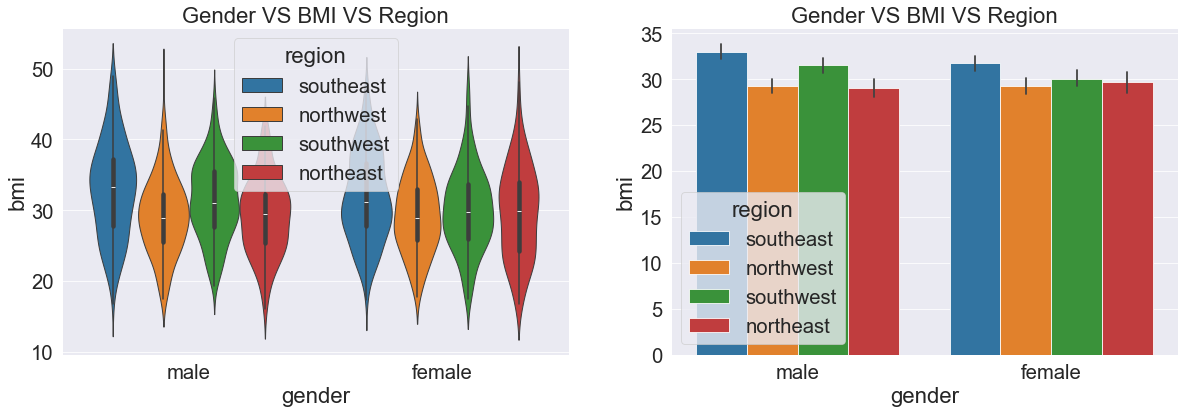

In [147]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bmi'],hue=df['region'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bmi'],hue=df['region'],ax=ax2)
ax1.set_title('Gender VS BMI VS Region')
ax2.set_title('Gender VS BMI VS Region');

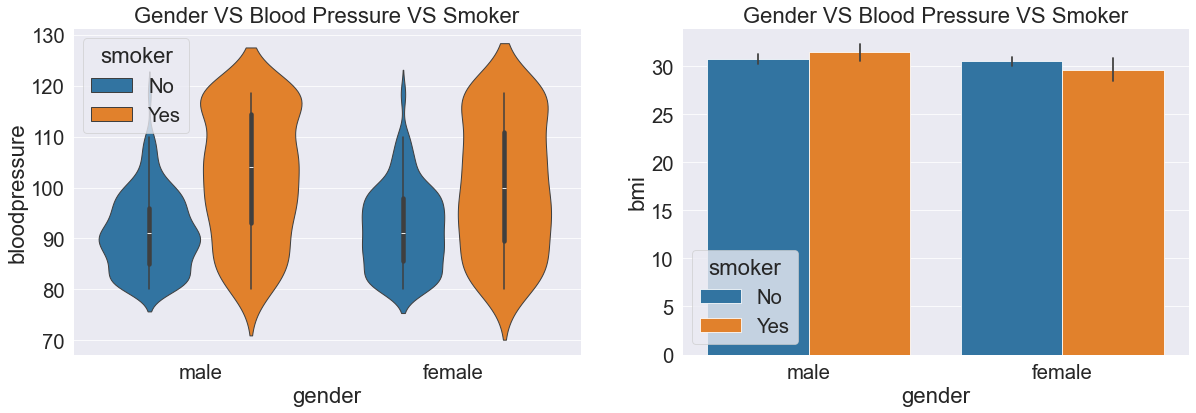

In [148]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bloodpressure'],hue=df['smoker'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bmi'],hue=df['smoker'],ax=ax2)
ax1.set_title('Gender VS Blood Pressure VS Smoker')
ax2.set_title('Gender VS Blood Pressure VS Smoker');

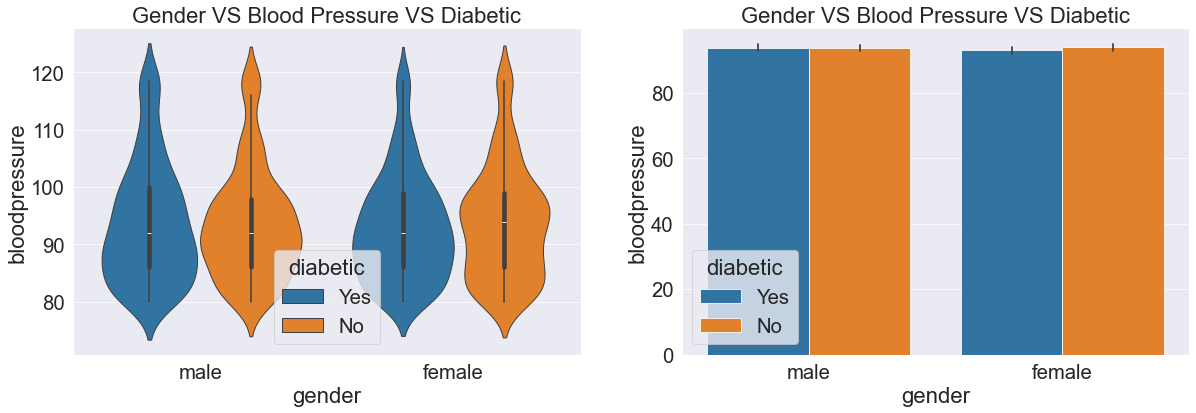

In [149]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bloodpressure'],hue=df['diabetic'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bloodpressure'],hue=df['diabetic'],ax=ax2)
ax1.set_title('Gender VS Blood Pressure VS Diabetic')
ax2.set_title('Gender VS Blood Pressure VS Diabetic');

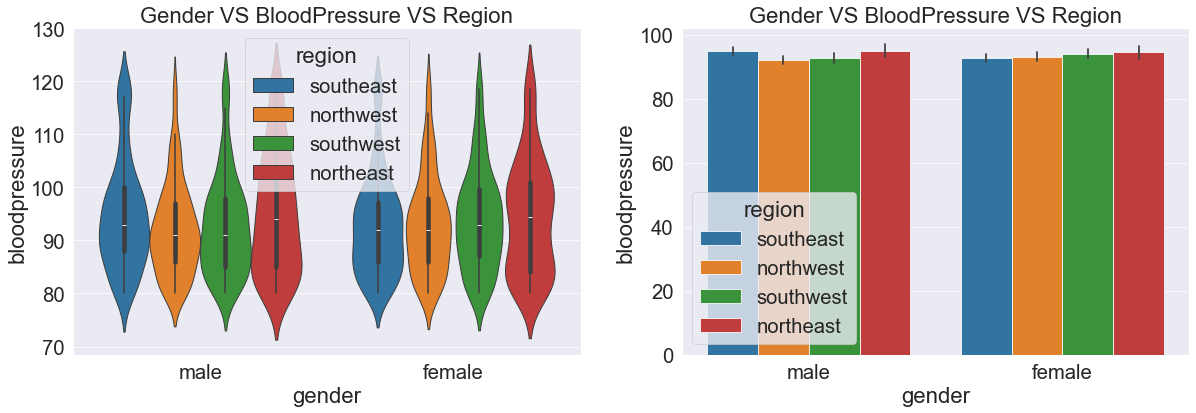

In [150]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bloodpressure'],hue=df['region'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bloodpressure'],hue=df['region'],ax=ax2)
ax1.set_title('Gender VS BloodPressure VS Region')
ax2.set_title('Gender VS BloodPressure VS Region');

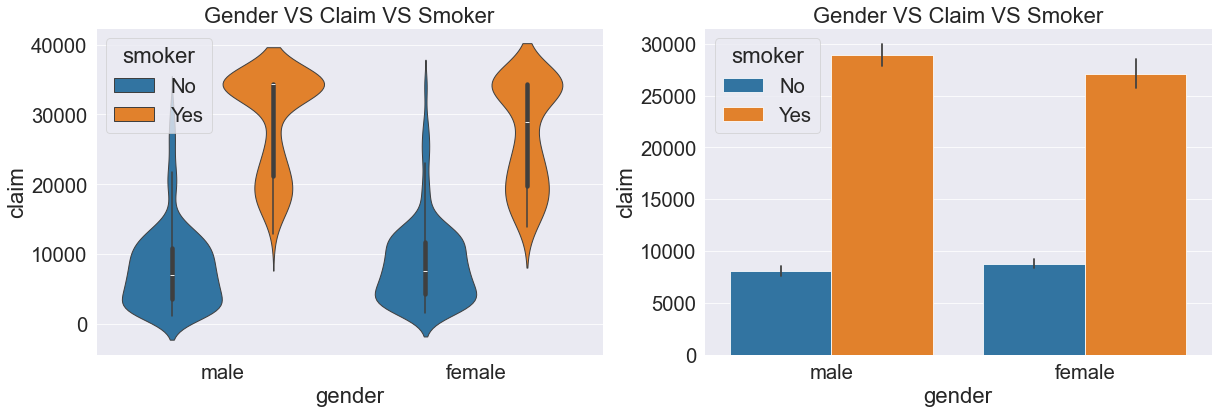

In [151]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['claim'],hue=df['smoker'],ax=ax1)
sns.barplot(x=df['gender'],y=df['claim'],hue=df['smoker'],ax=ax2)
ax1.set_title('Gender VS Claim VS Smoker')
ax2.set_title('Gender VS Claim VS Smoker');

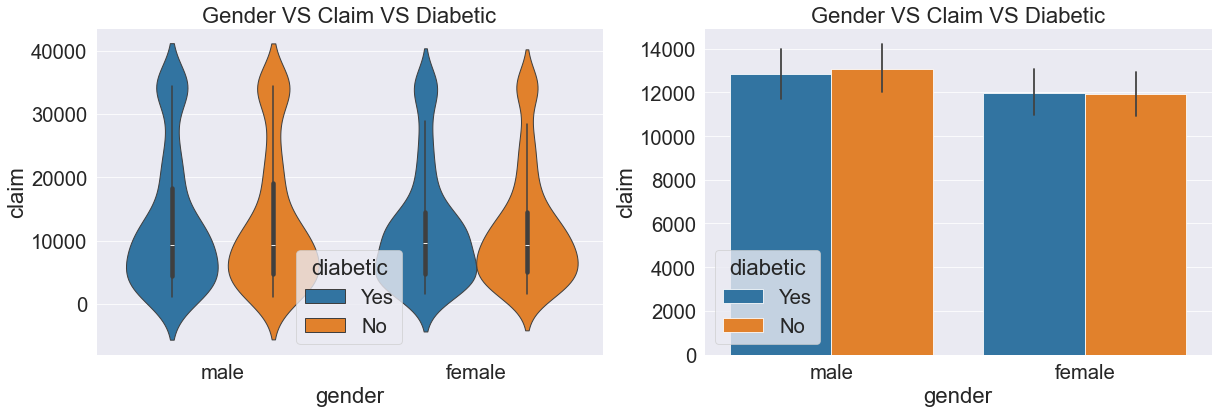

In [152]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['claim'],hue=df['diabetic'],ax=ax1)
sns.barplot(x=df['gender'],y=df['claim'],hue=df['diabetic'],ax=ax2)
ax1.set_title('Gender VS Claim VS Diabetic')
ax2.set_title('Gender VS Claim VS Diabetic');

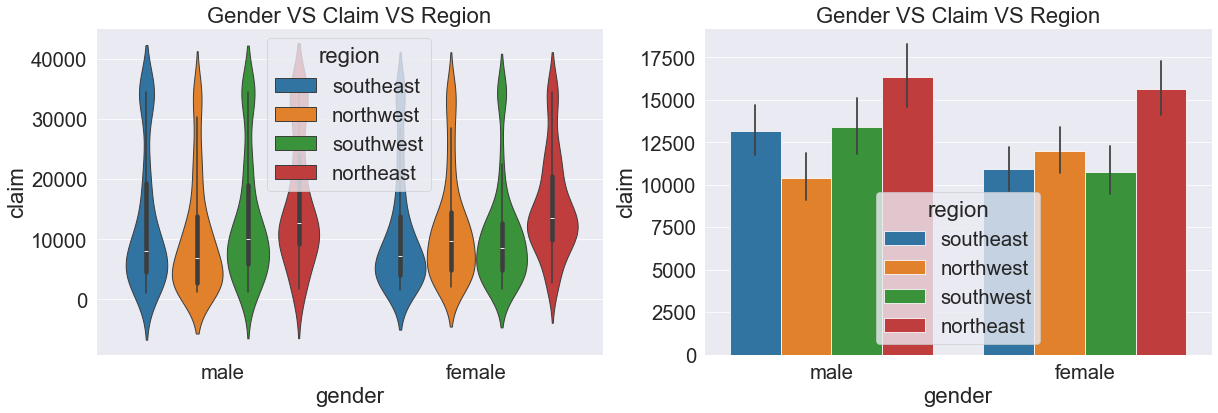

In [153]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['claim'],hue=df['region'],ax=ax1)
sns.barplot(x=df['gender'],y=df['claim'],hue=df['region'],ax=ax2)
ax1.set_title('Gender VS Claim VS Region')
ax2.set_title('Gender VS Claim VS Region');

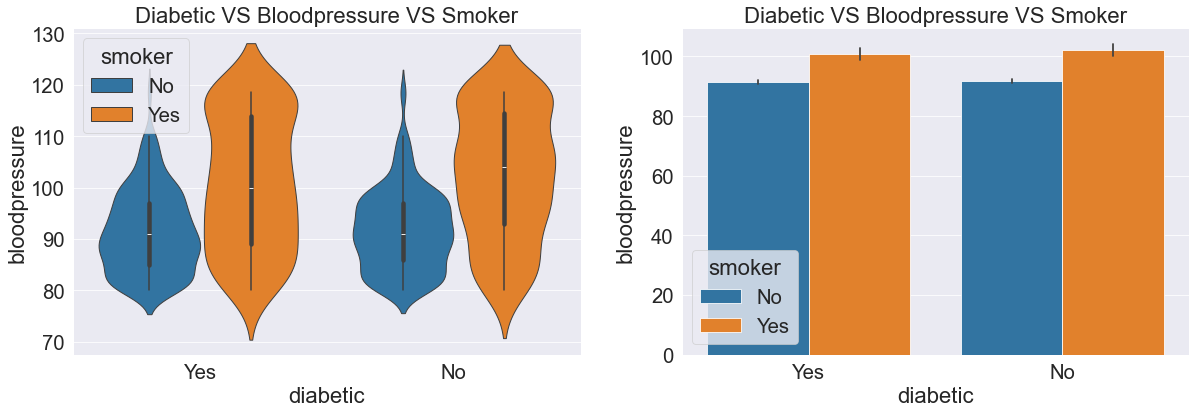

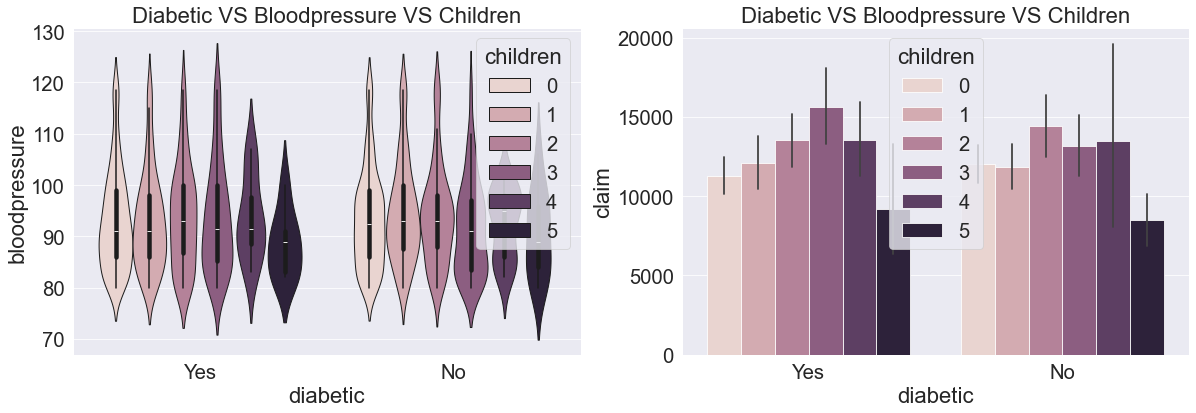

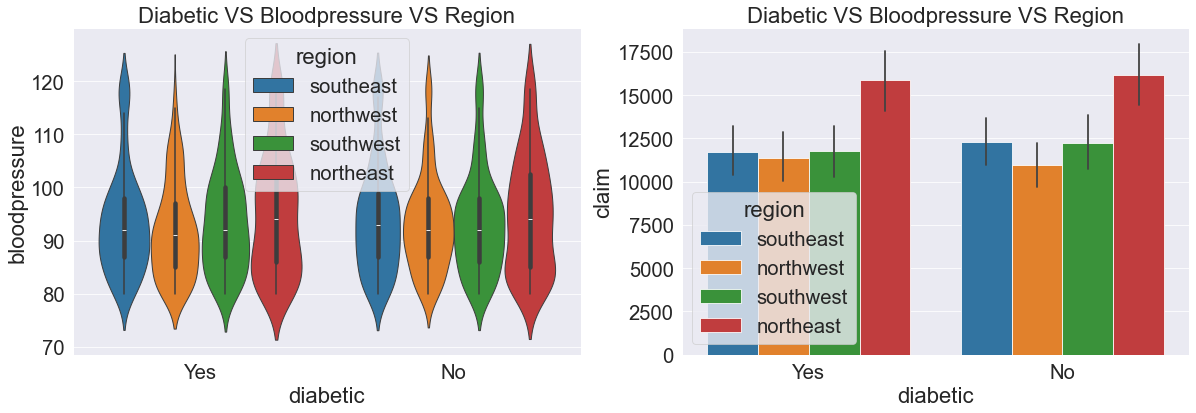

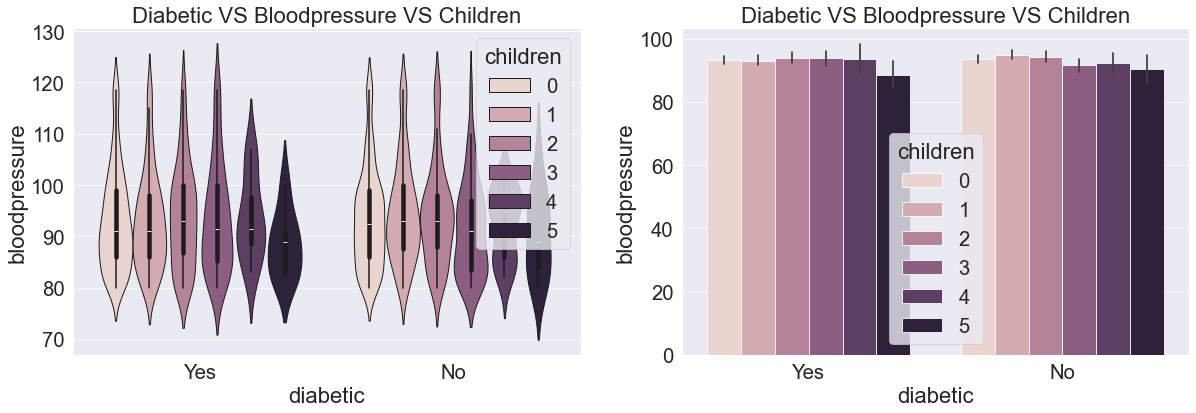

In [154]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['diabetic'],y=df['bloodpressure'],hue=df['smoker'],ax=ax1)
sns.barplot(x=df['diabetic'],y=df['bloodpressure'],hue=df['smoker'],ax=ax2)
ax1.set_title('Diabetic VS Bloodpressure VS Smoker')
ax2.set_title('Diabetic VS Bloodpressure VS Smoker')


fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['diabetic'],y=df['bloodpressure'],hue=df['children'],ax=ax1)
sns.barplot(x=df['diabetic'],y=df['claim'],hue=df['children'],ax=ax2)
ax1.set_title('Diabetic VS Bloodpressure VS Children')
ax2.set_title('Diabetic VS Bloodpressure VS Children')

fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['diabetic'],y=df['bloodpressure'],hue=df['region'],ax=ax1)
sns.barplot(x=df['diabetic'],y=df['claim'],hue=df['region'],ax=ax2)
ax1.set_title('Diabetic VS Bloodpressure VS Region')
ax2.set_title('Diabetic VS Bloodpressure VS Region')


fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['diabetic'],y=df['bloodpressure'],hue=df['children'],ax=ax1)
sns.barplot(x=df['diabetic'],y=df['bloodpressure'],hue=df['children'],ax=ax2)
ax1.set_title('Diabetic VS Bloodpressure VS Children')
ax2.set_title('Diabetic VS Bloodpressure VS Children');

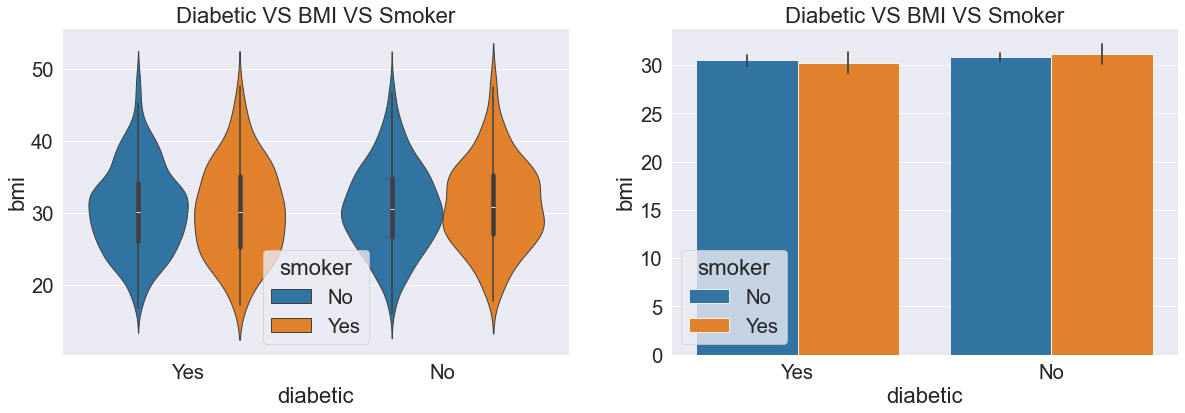

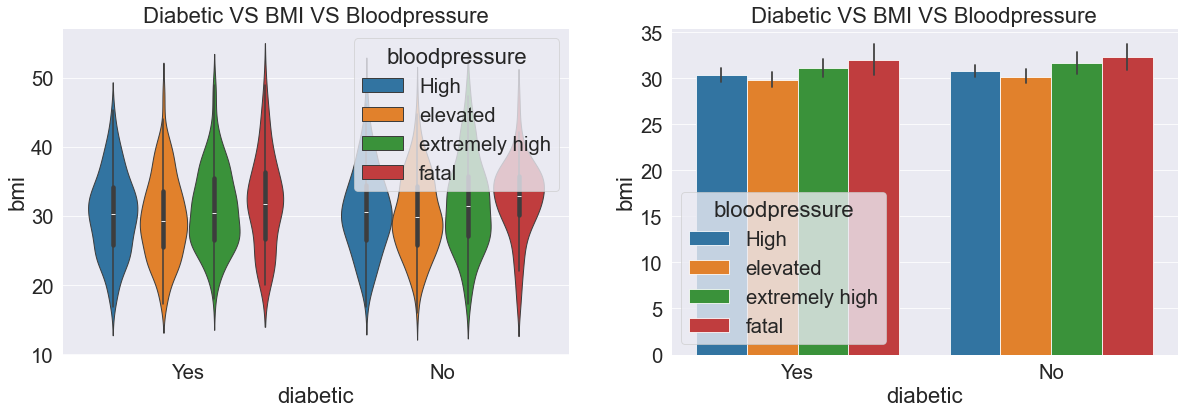

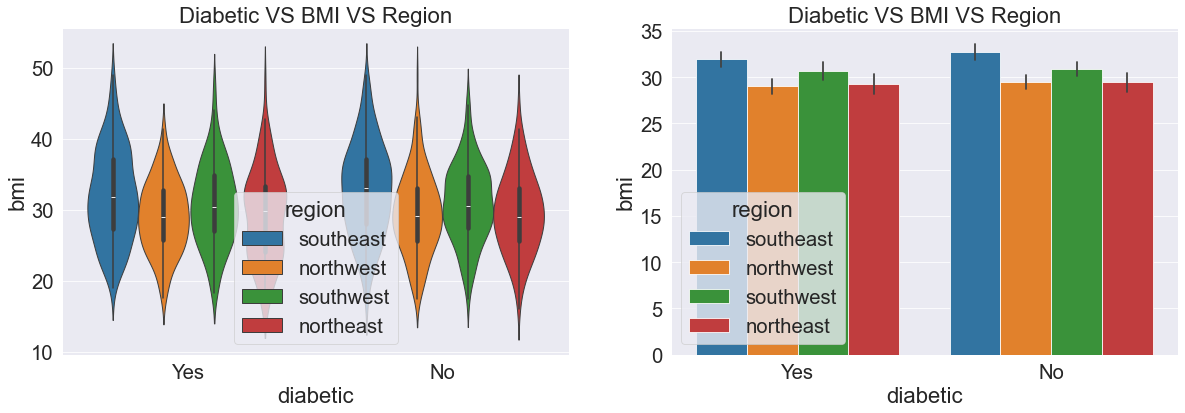

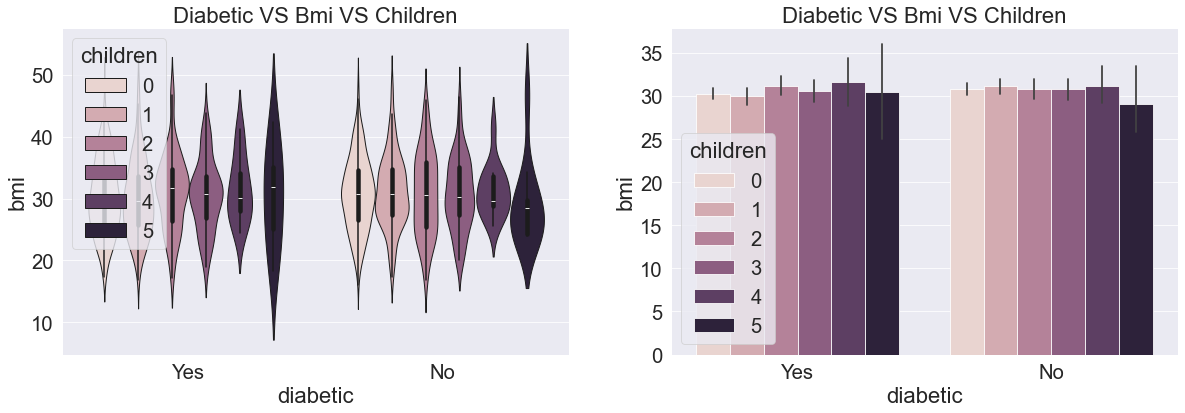

In [155]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['diabetic'],y=df['bmi'],hue=df['smoker'],ax=ax1)
sns.barplot(x=df['diabetic'],y=df['bmi'],hue=df['smoker'],ax=ax2)
ax1.set_title('Diabetic VS BMI VS Smoker')
ax2.set_title('Diabetic VS BMI VS Smoker')



fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['diabetic'],y=df['bmi'],hue=cat_df['bloodpressure'],ax=ax1)
sns.barplot(x=df['diabetic'],y=df['bmi'],hue=cat_df['bloodpressure'],ax=ax2)
ax1.set_title('Diabetic VS BMI VS Bloodpressure')
ax2.set_title('Diabetic VS BMI VS Bloodpressure')

fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['diabetic'],y=df['bmi'],hue=df['region'],ax=ax1)
sns.barplot(x=df['diabetic'],y=df['bmi'],hue=df['region'],ax=ax2)
ax1.set_title('Diabetic VS BMI VS Region')
ax2.set_title('Diabetic VS BMI VS Region')


fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['diabetic'],y=df['bmi'],hue=df['children'],ax=ax1)
sns.barplot(x=df['diabetic'],y=df['bmi'],hue=df['children'],ax=ax2)
ax1.set_title('Diabetic VS Bmi VS Children')
ax2.set_title('Diabetic VS Bmi VS Children');

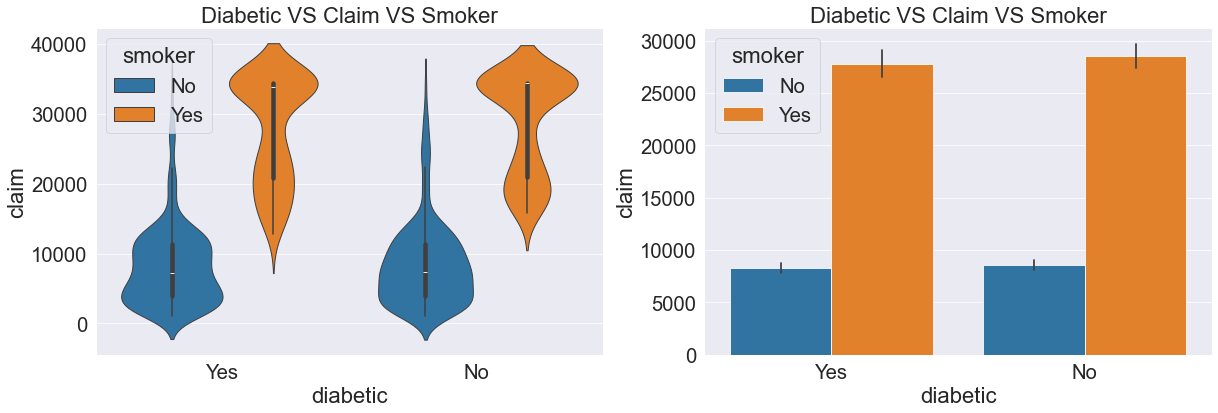

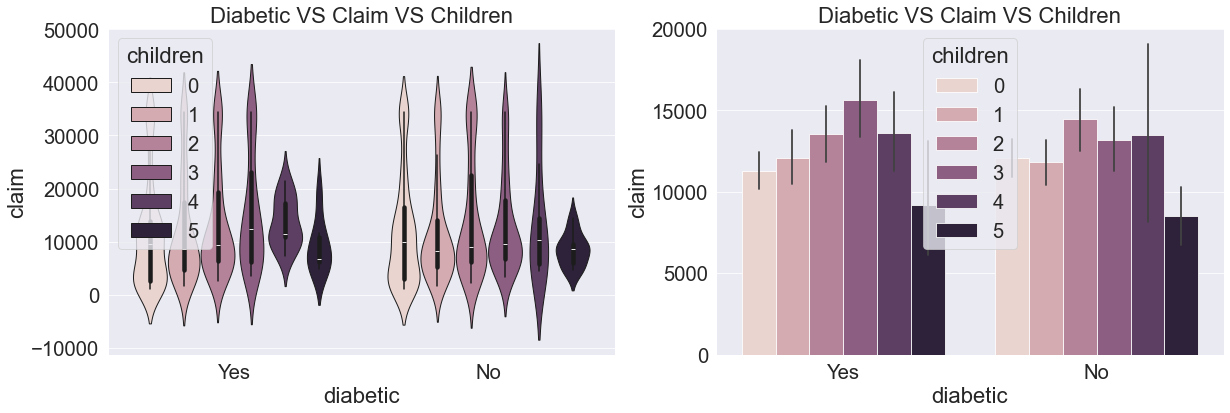

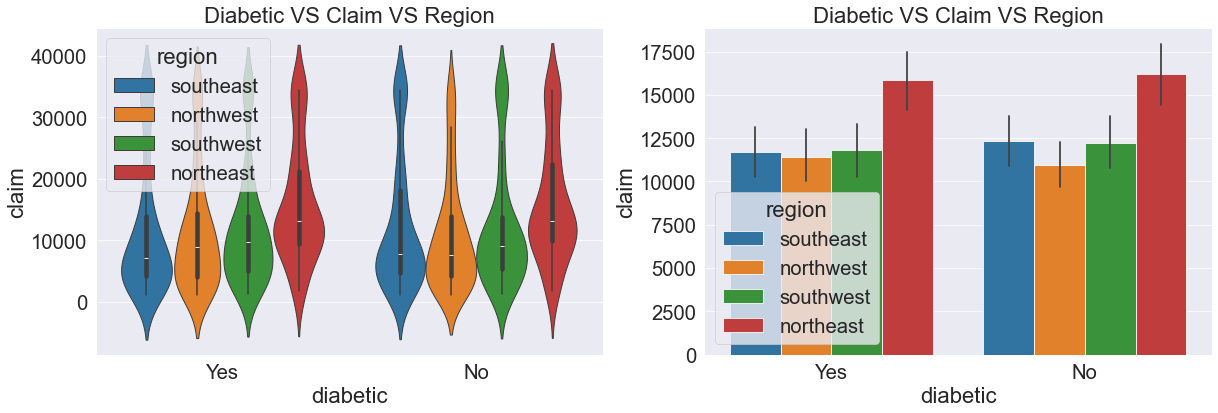

In [156]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['diabetic'],y=df['claim'],hue=df['smoker'],ax=ax1)
sns.barplot(x=df['diabetic'],y=df['claim'],hue=df['smoker'],ax=ax2)
ax1.set_title('Diabetic VS Claim VS Smoker')
ax2.set_title('Diabetic VS Claim VS Smoker')


fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['diabetic'],y=df['claim'],hue=df['children'],ax=ax1)
sns.barplot(x=df['diabetic'],y=df['claim'],hue=df['children'],ax=ax2)
ax1.set_title('Diabetic VS Claim VS Children')
ax2.set_title('Diabetic VS Claim VS Children')

fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['diabetic'],y=df['claim'],hue=df['region'],ax=ax1)
sns.barplot(x=df['diabetic'],y=df['claim'],hue=df['region'],ax=ax2)
ax1.set_title('Diabetic VS Claim VS Region')
ax2.set_title('Diabetic VS Claim VS Region');

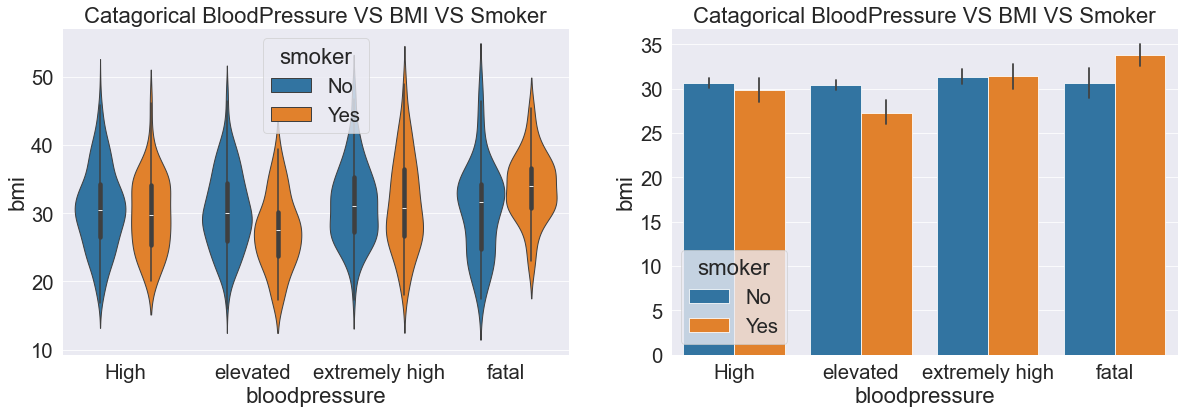

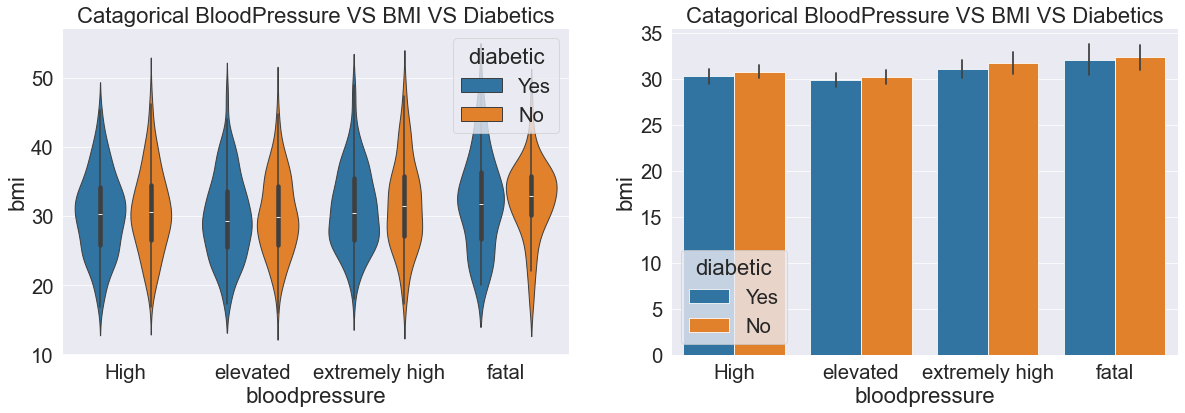

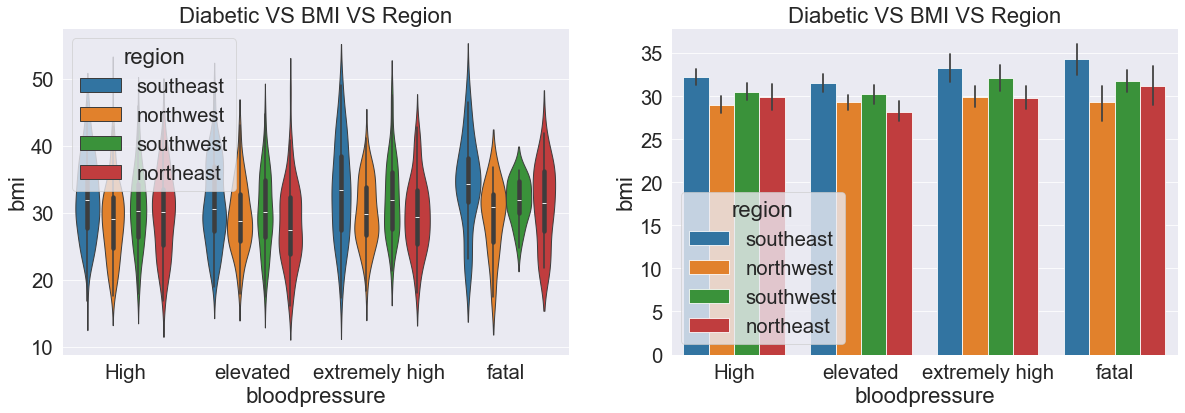

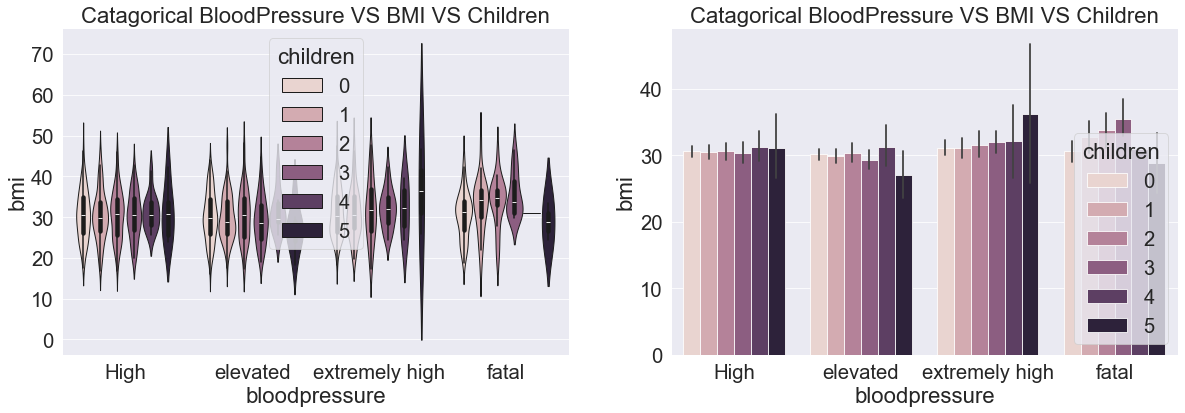

In [157]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=cat_df['bloodpressure'],y=df['bmi'],hue=df['smoker'],ax=ax1)
sns.barplot(x=cat_df['bloodpressure'],y=df['bmi'],hue=df['smoker'],ax=ax2)
ax1.set_title('Catagorical BloodPressure VS BMI VS Smoker')
ax2.set_title('Catagorical BloodPressure VS BMI VS Smoker')



fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=cat_df['bloodpressure'],y=df['bmi'],hue=df['diabetic'],ax=ax1)
sns.barplot(x=cat_df['bloodpressure'],y=df['bmi'],hue=df['diabetic'],ax=ax2)
ax1.set_title('Catagorical BloodPressure VS BMI VS Diabetics')
ax2.set_title('Catagorical BloodPressure VS BMI VS Diabetics')


fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=cat_df['bloodpressure'],y=df['bmi'],hue=df['region'],ax=ax1)
sns.barplot(x=cat_df['bloodpressure'],y=df['bmi'],hue=df['region'],ax=ax2)
ax1.set_title('Diabetic VS BMI VS Region')
ax2.set_title('Diabetic VS BMI VS Region')


fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=cat_df['bloodpressure'],y=df['bmi'],hue=df['children'],ax=ax1)
sns.barplot(x=cat_df['bloodpressure'],y=df['bmi'],hue=df['children'],ax=ax2)
ax1.set_title('Catagorical BloodPressure VS BMI VS Children')
ax2.set_title('Catagorical BloodPressure VS BMI VS Children');

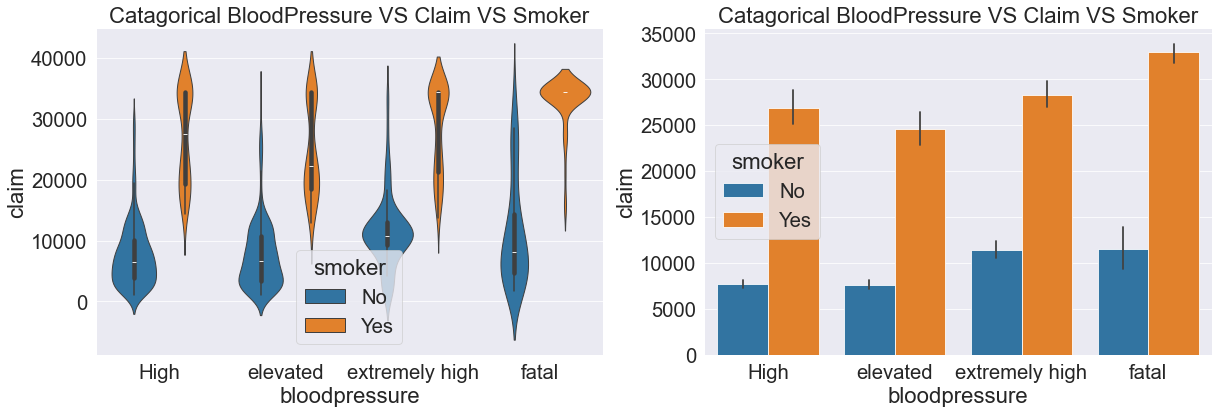

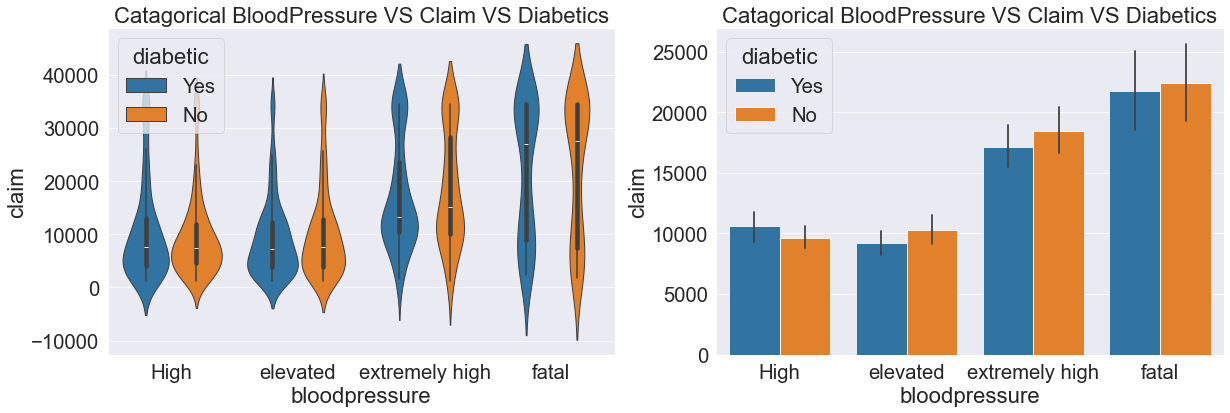

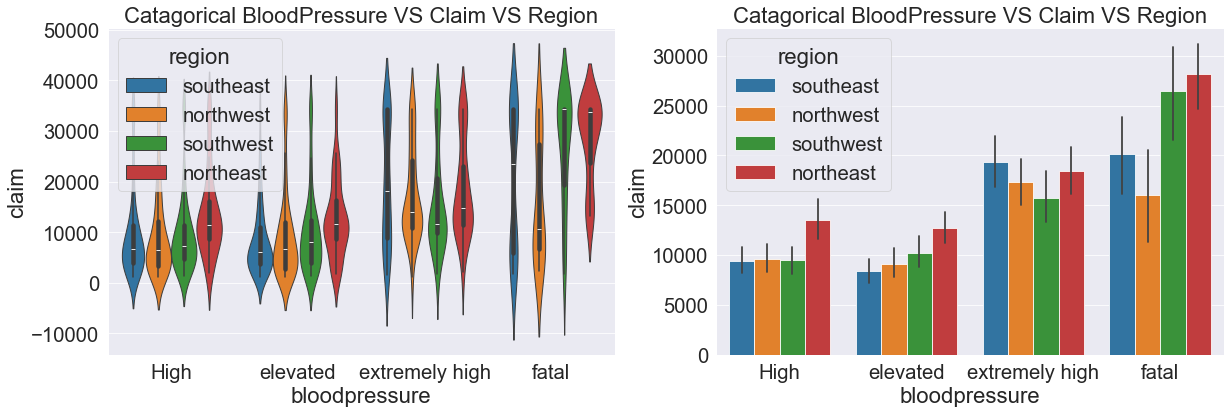

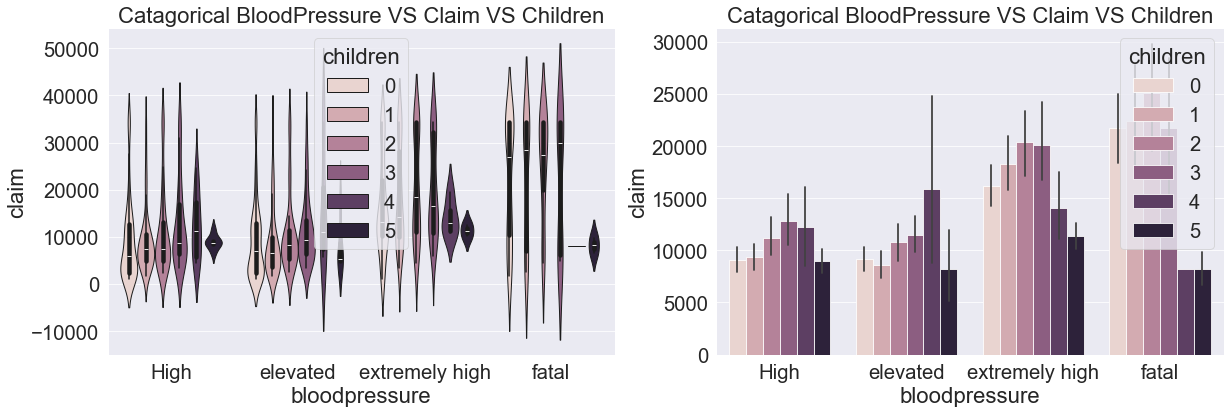

In [158]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=cat_df['bloodpressure'],y=df['claim'],hue=df['smoker'],ax=ax1)
sns.barplot(x=cat_df['bloodpressure'],y=df['claim'],hue=df['smoker'],ax=ax2)
ax1.set_title('Catagorical BloodPressure VS Claim VS Smoker')
ax2.set_title('Catagorical BloodPressure VS Claim VS Smoker')



fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=cat_df['bloodpressure'],y=df['claim'],hue=df['diabetic'],ax=ax1)
sns.barplot(x=cat_df['bloodpressure'],y=df['claim'],hue=df['diabetic'],ax=ax2)
ax1.set_title('Catagorical BloodPressure VS Claim VS Diabetics')
ax2.set_title('Catagorical BloodPressure VS Claim VS Diabetics')


fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=cat_df['bloodpressure'],y=df['claim'],hue=df['region'],ax=ax1)
sns.barplot(x=cat_df['bloodpressure'],y=df['claim'],hue=df['region'],ax=ax2)
ax1.set_title('Catagorical BloodPressure VS Claim VS Region')
ax2.set_title('Catagorical BloodPressure VS Claim VS Region')


fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=cat_df['bloodpressure'],y=df['claim'],hue=df['children'],ax=ax1)
sns.barplot(x=cat_df['bloodpressure'],y=df['claim'],hue=df['children'],ax=ax2)
ax1.set_title('Catagorical BloodPressure VS Claim VS Children')
ax2.set_title('Catagorical BloodPressure VS Claim VS Children');

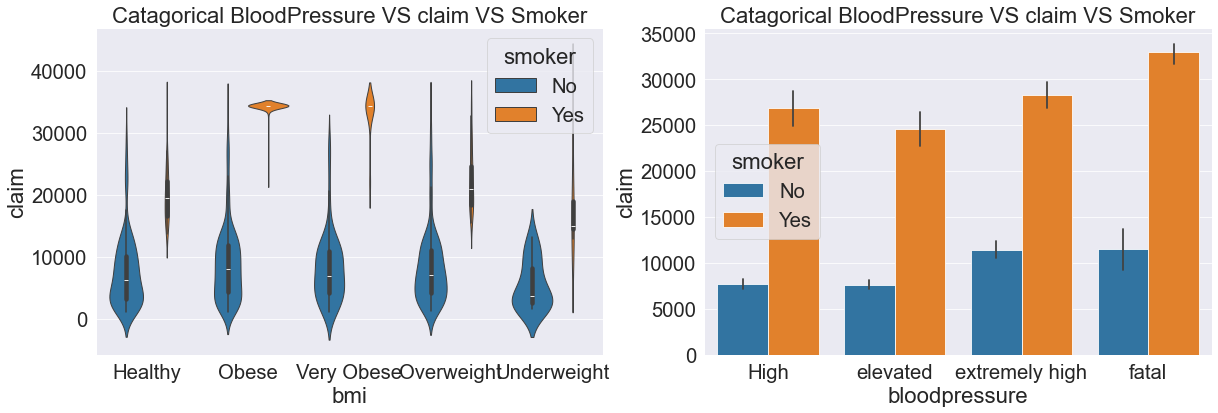

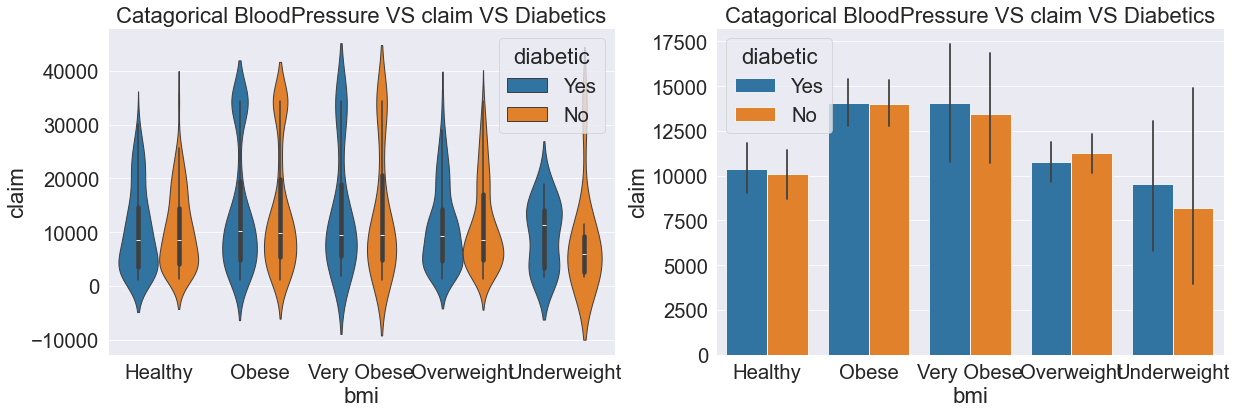

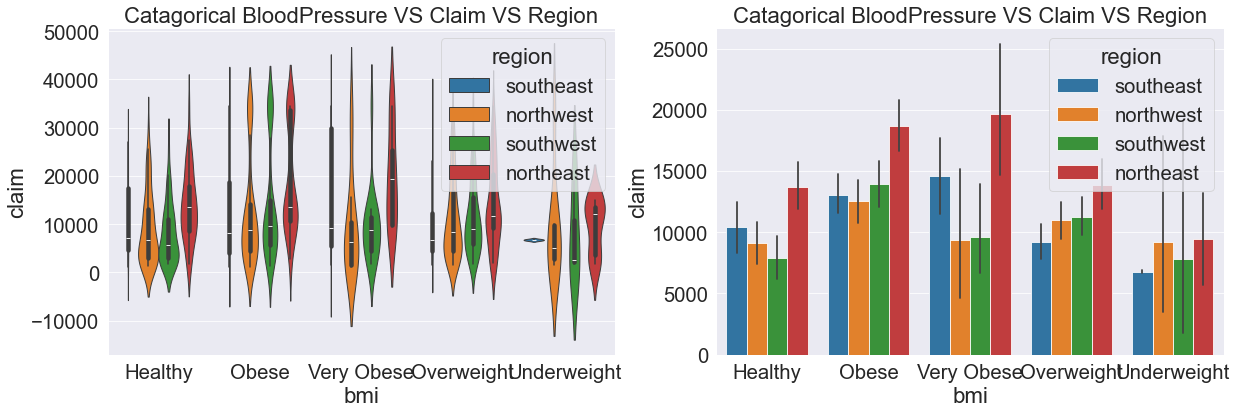

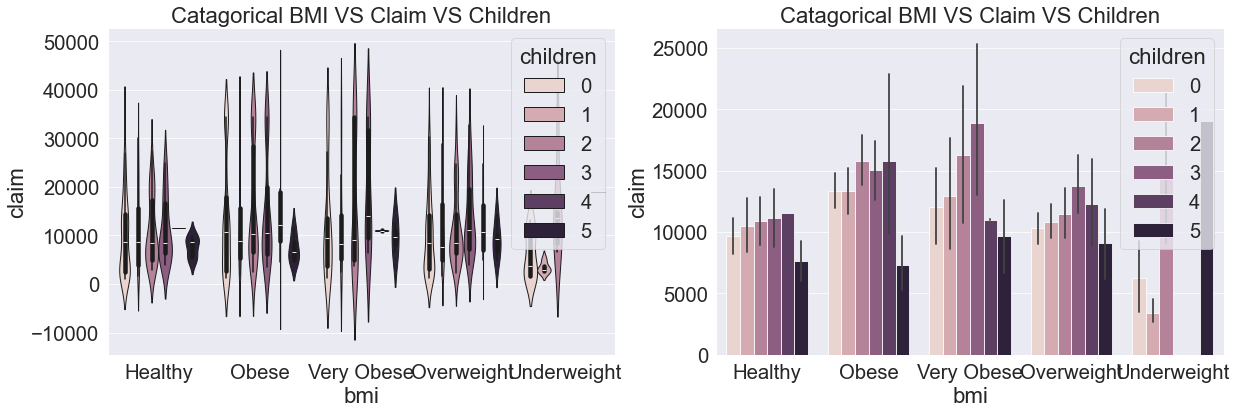

In [159]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=cat_df['bmi'],y=df['claim'],hue=df['smoker'],ax=ax1)
sns.barplot(x=cat_df['bloodpressure'],y=df['claim'],hue=df['smoker'],ax=ax2)
ax1.set_title('Catagorical BloodPressure VS claim VS Smoker')
ax2.set_title('Catagorical BloodPressure VS claim VS Smoker')



fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=cat_df['bmi'],y=df['claim'],hue=df['diabetic'],ax=ax1)
sns.barplot(x=cat_df['bmi'],y=df['claim'],hue=df['diabetic'],ax=ax2)
ax1.set_title('Catagorical BloodPressure VS claim VS Diabetics')
ax2.set_title('Catagorical BloodPressure VS claim VS Diabetics')


fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=cat_df['bmi'],y=df['claim'],hue=df['region'],ax=ax1)
sns.barplot(x=cat_df['bmi'],y=df['claim'],hue=df['region'],ax=ax2)
ax1.set_title('Catagorical BloodPressure VS Claim VS Region')
ax2.set_title('Catagorical BloodPressure VS Claim VS Region')


fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=cat_df['bmi'],y=df['claim'],hue=df['children'],ax=ax1)
sns.barplot(x=cat_df['bmi'],y=df['claim'],hue=df['children'],ax=ax2)
ax1.set_title('Catagorical BMI VS Claim VS Children')
ax2.set_title('Catagorical BMI VS Claim VS Children');

### Num to Num Features

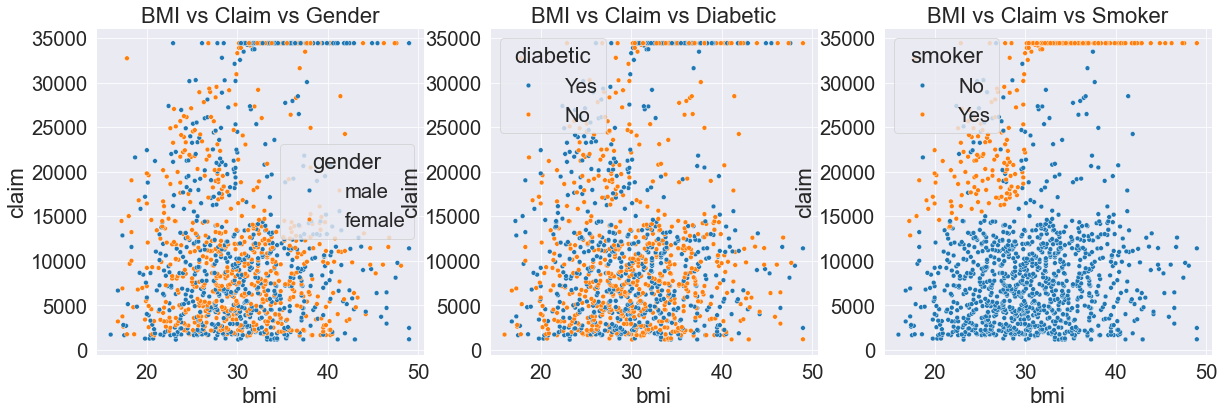

In [160]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2,ax3) = fig.subplots(1,3)
sns.scatterplot(x=df['bmi'],y=df['claim'],hue=df['gender'],ax=ax1)
ax1.set_title('BMI vs Claim vs Gender')

sns.scatterplot(x=df['bmi'],y=df['claim'],hue=df['diabetic'],ax=ax2)
ax2.set_title('BMI vs Claim vs Diabetic')

sns.scatterplot(x=df['bmi'],y=df['claim'],hue=df['smoker'],ax=ax3)
ax3.set_title('BMI vs Claim vs Smoker');

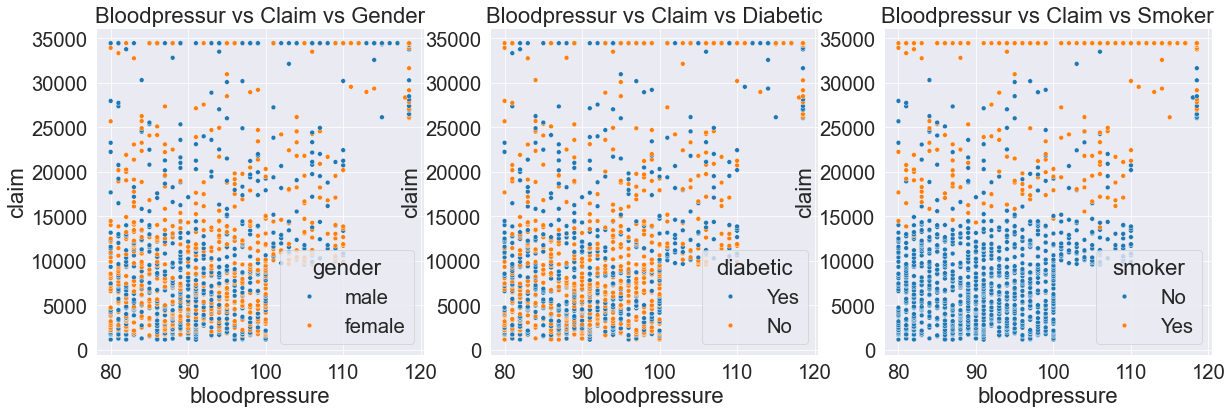

In [161]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2,ax3) = fig.subplots(1,3)
sns.scatterplot(x=df['bloodpressure'],y=df['claim'],hue=df['gender'],ax=ax1)
ax1.set_title('Bloodpressur vs Claim vs Gender')
sns.scatterplot(x=df['bloodpressure'],y=df['claim'],hue=df['diabetic'],ax=ax2)
ax2.set_title('Bloodpressur vs Claim vs Diabetic')

sns.scatterplot(x=df['bloodpressure'],y=df['claim'],hue=df['smoker'],ax=ax3);
ax3.set_title('Bloodpressur vs Claim vs Smoker');

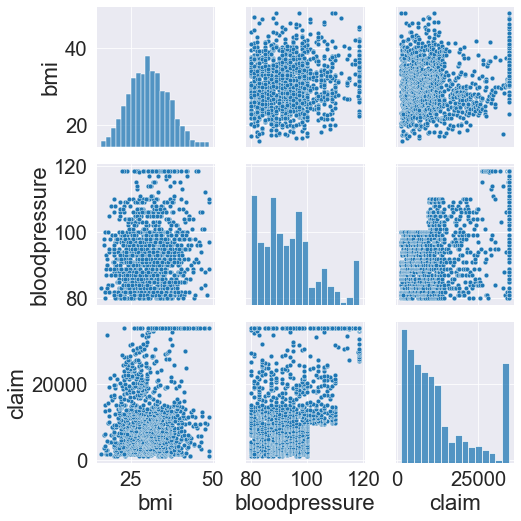

In [162]:
 sns.pairplot(df[['bmi','bloodpressure','claim']]);

In [163]:
df[['bmi','bloodpressure','claim']].corr()

bmi  bloodpressure     claim
bmi            1.000000       0.141027  0.159282
bloodpressure  0.141027       1.000000  0.507597
claim          0.159282       0.507597  1.000000

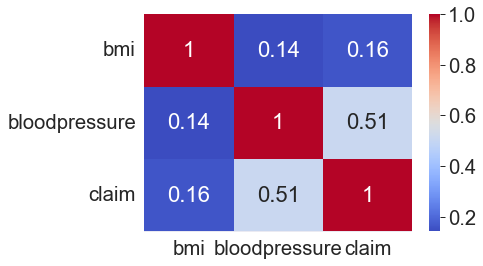

In [164]:
sns.heatmap(df[['bmi','bloodpressure','claim']].corr(),annot=True,cmap='coolwarm');

In [165]:
df.isnull().sum()

age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

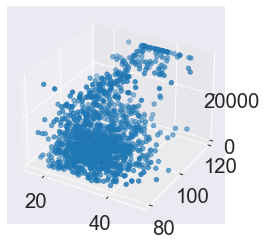

In [166]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(df['bmi'],df['bloodpressure'],df['claim']);

### Feature Engineering

In [167]:
from sklearn.preprocessing import FunctionTransformer

### Log Transformation

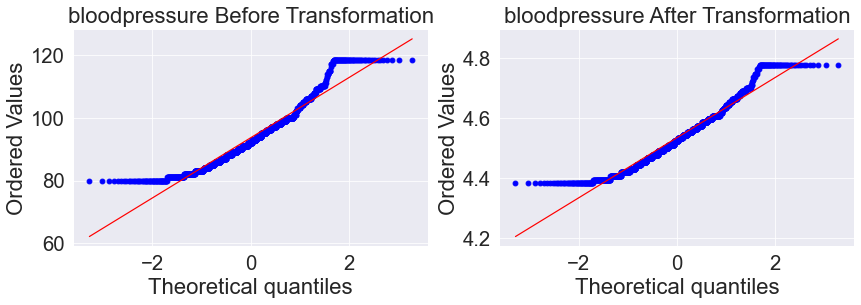

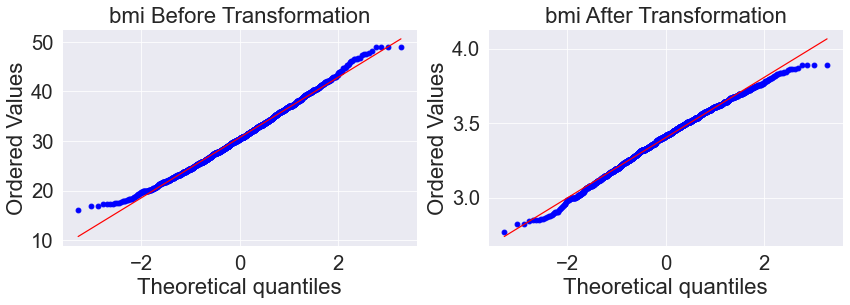

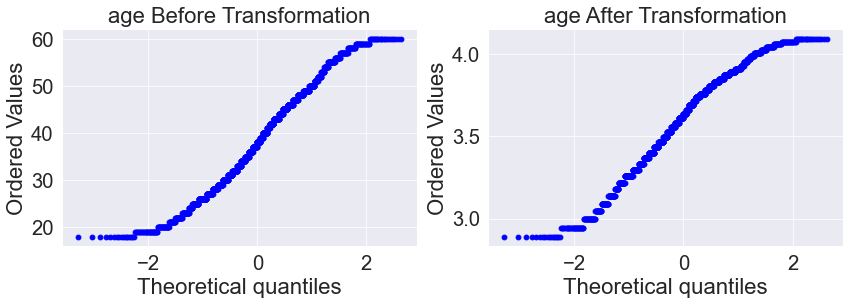

In [184]:
from copy import deepcopy 
def log_transformation(val):
    return np.log(val)
import scipy.stats as stats
num_cols = ['bloodpressure','bmi','age']
temp_df = deepcopy (df)
for col in num_cols:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f'{col} Before Transformation')    
    
    temp_df[col] = df[col].apply(log_transformation)
    
    plt.subplot(122)
    stats.probplot(temp_df[col], dist="norm", plot=plt)
    plt.title(f'{col} After Transformation')
    plt.show();    

### Feature Scalling 

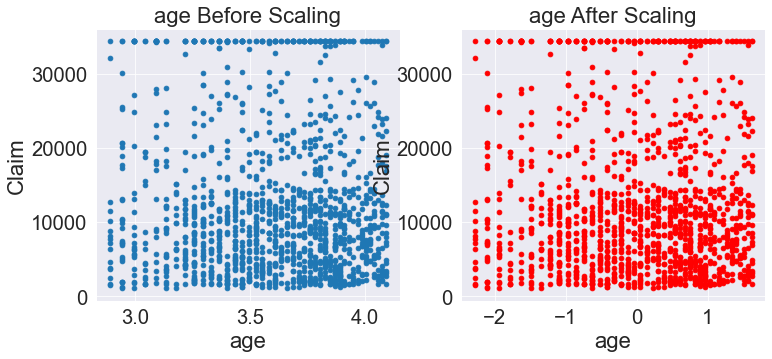

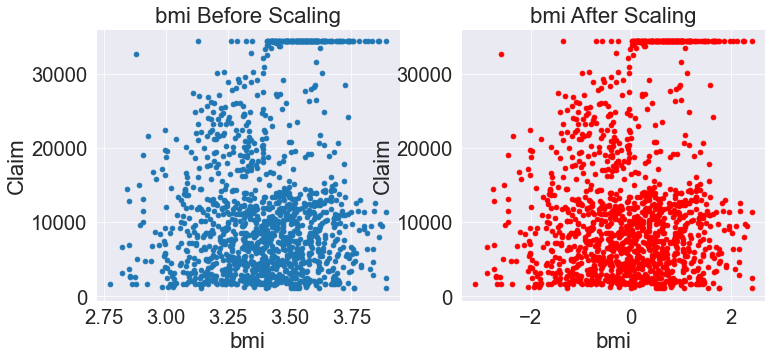

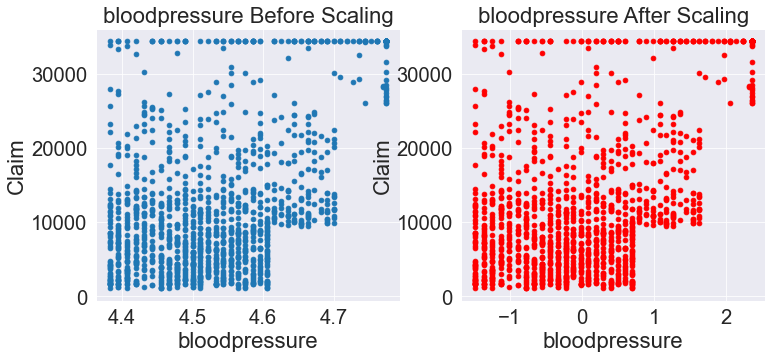

In [169]:
num_cols = ['age','bmi','bloodpressure']
for col in num_cols:
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
    ax1.scatter(temp_df[col], temp_df['claim'])
    ax1.set_title(f"{col} Before Scaling") 
    ax1.set_xlabel(f"{col}") 
    ax1.set_ylabel("Claim") 
    scaler = StandardScaler()
    scaler.fit(temp_df[[col]]) 
    temp_df[col] = scaler.transform(temp_df[[col]])
    ax2.scatter(temp_df[col], temp_df['claim'],color='red')
    ax2.set_title(f"{col} After Scaling")
    ax2.set_xlabel(f"{col}") 
    ax2.set_ylabel("Claim") 
    plt.show();

### Model Building and Training

In [177]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [178]:
# Splitting the data
X = temp_df.drop(columns=['claim'])
y = temp_df[['claim']]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [179]:
# Categorical columns and preprocessor
numeric_cols = [0, 2, 3]
categorical_cols = [1,4,6,7]
# Defining the pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse=False,drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Creating the pipeline with preprocessing and linear regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])



In [180]:
x_train = pipeline.fit_transform(x_train)
x_test = pipeline.transform(x_test)

C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [181]:
x_train

array([[-0.41564771, -0.58484196,  2.05655455, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.09387952, -0.7735794 , -1.12526795, ...,  1.        ,
         0.        ,  0.        ],
       [-0.41564771,  1.28855169,  0.29451538, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.03418318,  0.02419136,  2.34909109, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.05455402,  0.52215356, -1.00841083, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.09387952,  1.64317904,  1.26139014, ...,  0.        ,
         1.        ,  0.        ]])

In [185]:
model = LinearRegression()

In [186]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

### Evaluating the model

In [187]:
def r2_adjusted_score(r2,rows,cols):
    return 1 - ( ((1-r2)*(rows-1))/(rows-1-cols))

In [188]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
Adjusted_R2_Score = r2_adjusted_score(r2,x_train.shape[0],x_train.shape[1])

### Displaying the evaluation metrics

In [189]:
x_train.shape

(1072, 9)

In [190]:
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
print("Adjusted R2 squared:", Adjusted_R2_Score)

Mean Absolute Error: 3976.6700154514124
Mean Squared Error: 28248249.95029035
Root Mean Squared Error: 5314.908272989323
R-squared: 0.7420951073799544
Adjusted R2 squared: 0.7399094726967337


# Assumptions of Linear Regression

### 1. Linear Relationship

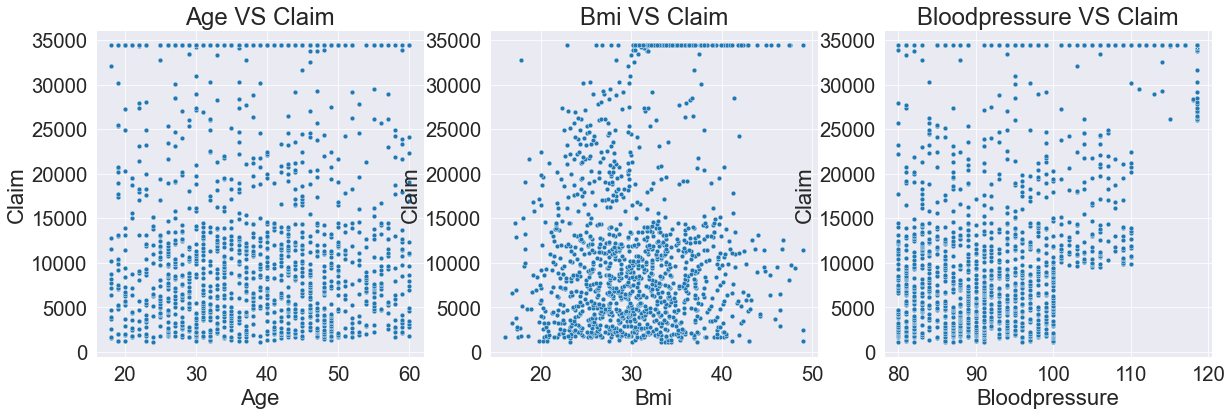

In [191]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2,ax3) = fig.subplots(1,3)
sns.scatterplot(x=df['age'],y=df['claim'],ax=ax1)
ax1.set_xlabel('Age')
ax1.set_ylabel('Claim')
ax1.set_title('Age VS Claim', fontsize=24, loc='center');

sns.scatterplot(x=df['bmi'],y=df['claim'],ax=ax2);
ax2.set_xlabel('Bmi')
ax2.set_ylabel('Claim')
ax2.set_title('Bmi VS Claim', fontsize=24, loc='center');

sns.scatterplot(x=df['bloodpressure'],y=df['claim'],ax=ax3);
ax3.set_xlabel('Bloodpressure')
ax3.set_ylabel('Claim')
ax3.set_title('Bloodpressure VS Claim', fontsize=24, loc='center');

### 2. Multicollinearity

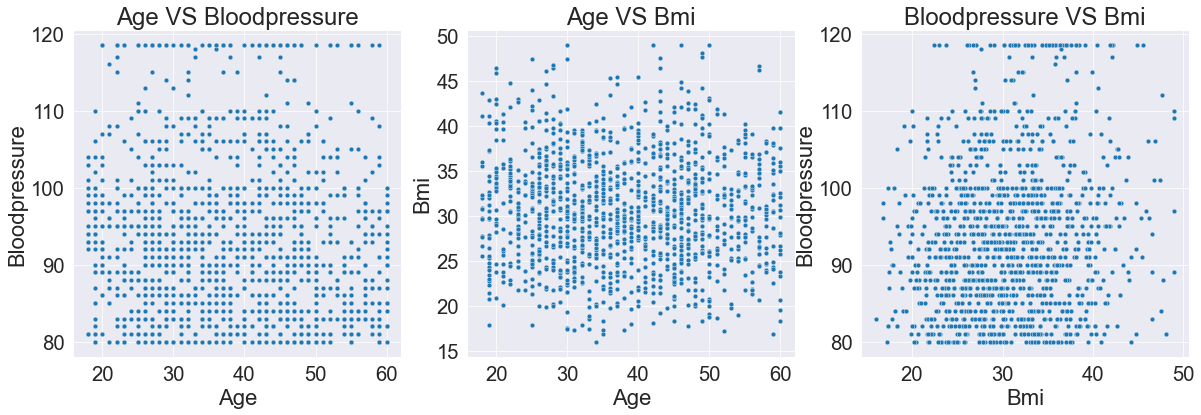

In [192]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2,ax3) = fig.subplots(1,3)
sns.scatterplot(x=df['age'],y=df['bloodpressure'],ax=ax1);
ax1.set_xlabel('Age')
ax1.set_ylabel('Bloodpressure')
ax1.set_title('Age VS Bloodpressure', fontsize=24, loc='center')

sns.scatterplot(x=df['age'],y=df['bmi'],ax=ax2);
ax2.set_xlabel('Age')
ax2.set_ylabel('Bmi')
ax2.set_title('Age VS Bmi', fontsize=24, loc='center')

sns.scatterplot(x=df['bmi'],y=df['bloodpressure']);
ax3.set_xlabel('Bmi')
ax3.set_ylabel('Bloodpressure')
ax3.set_title('Bloodpressure VS Bmi', fontsize=24, loc='center');

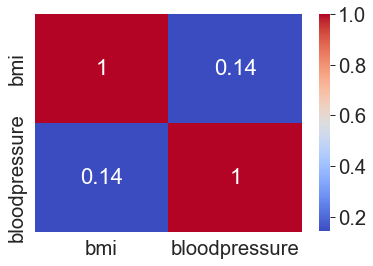

In [193]:
sns.heatmap(df[['bmi','bloodpressure']].corr(),annot=True,cmap='coolwarm');

> <h3>Assumption of Linear Regression:</h3> <h3>There is No Correlation between Input Features</h3>

### 3. Normality of Residual

In [194]:
residual = y_test - y_pred

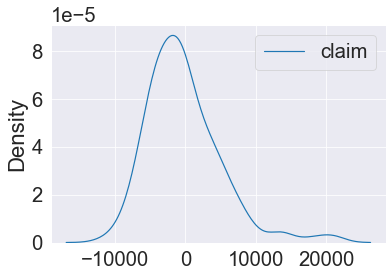

In [195]:
sns.kdeplot(residual);

In [196]:
residual.skew()

claim    1.272454
dtype: float64

### 4. Homoscedasticity

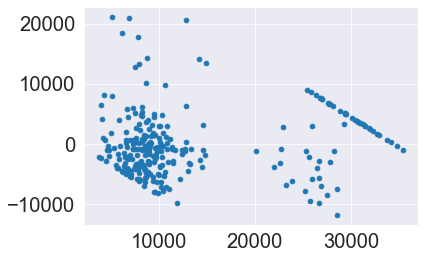

In [197]:
plt.scatter(y_pred,residual);

### 5. Autocorrelation of Residuals

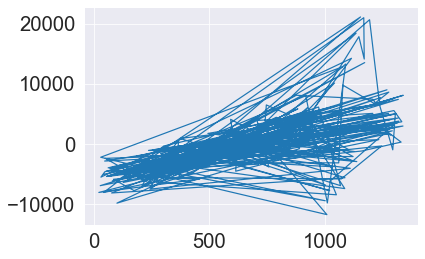

In [198]:
plt.plot(residual);

### Feature Engineering Complete Pipe Line

In [199]:
X = df.drop(columns=['claim'])
y = df[['claim']]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [200]:
numeric_cols = [0, 2, 3]
categorical_cols = [1,4,6,7]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('log_transformer', FunctionTransformer(np.log1p, validate=True)),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('linearregression', LinearRegression())
])



In [201]:
pipeline.fit(x_train, y_train)

y_pred = pipeline.predict(x_test)

C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Model Evaluation

In [202]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

### Displaying the evaluation metrics

In [203]:
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 3982.50197761194
Mean Squared Error: 28248990.08329795
Root Mean Squared Error: 5314.977900546525
R-squared: 0.7420883500082878


### Model Optimization By RandomSearch and GridSearch

In [204]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [205]:
X = df.drop(columns=['claim'])
y = df[['claim']]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [206]:
numeric_cols = [0, 2, 3]
categorical_cols = [1,4,6,7]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('log_transformer', FunctionTransformer(np.log1p, validate=True)),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse=False,drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])



In [207]:
x_train = pipeline.fit_transform(x_train)

x_test = pipeline.transform(x_test)

C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [208]:
x_train

array([[-0.44070268, -0.56246217,  2.04764915, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.08447342, -0.75014637, -1.12027673, ...,  1.        ,
         0.        ,  0.        ],
       [-0.44070268,  1.31314744,  0.29200231, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.05697262,  0.04489253,  2.33940286, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.03247216,  0.54328177, -1.00412501, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.08447342,  1.67041896,  1.25500019, ...,  0.        ,
         1.        ,  0.        ]])

In [209]:
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)
linear_reg_predictions = linear_reg.predict(x_test)
linear_reg_mae = mean_absolute_error(y_test, linear_reg_predictions)
print("Linear Regression Mean Absolute Error:", linear_reg_mae)

Linear Regression Mean Absolute Error: 3977.5678840931523


### Ridge Regression

In [211]:
ridge = Ridge()
ridge_parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 0.01 ,0.001,0.0001,1, 1, 1.5,  5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}

ridge_regressor_grid = GridSearchCV(ridge, ridge_parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor_random = RandomizedSearchCV(ridge, ridge_parameters, scoring='neg_mean_squared_error', n_iter=10, cv=5, random_state=42)

ridge_regressor_grid.fit(x_train, y_train)
ridge_regressor_random.fit(x_train, y_train)

ridge_grid_predictions = ridge_regressor_grid.best_estimator_.predict(x_test)
ridge_random_predictions = ridge_regressor_random.best_estimator_.predict(x_test)

ridge_grid_mae = mean_absolute_error(y_test, ridge_grid_predictions)
ridge_random_mae = mean_absolute_error(y_test, ridge_random_predictions)



In [212]:
print("Ridge Regression Grid Search Mean Absolute Error:", ridge_grid_mae)
print("Ridge Regression Random Search Mean Absolute Error:", ridge_random_mae)


Ridge Regression Grid Search Mean Absolute Error: 3986.6757970223857
Ridge Regression Random Search Mean Absolute Error: 3986.6757970223857


In [213]:
ridge_regressor_random.best_params_

{'alpha': 1}

### Lasso Regression

In [214]:
lasso = Lasso()
lasso_parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}
lasso_regressor_grid = GridSearchCV(lasso, lasso_parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor_random = RandomizedSearchCV(lasso, lasso_parameters, scoring='neg_mean_squared_error', n_iter=10, cv=5, random_state=42)

lasso_regressor_grid.fit(x_train, y_train)
lasso_regressor_random.fit(x_train, y_train)

lasso_grid_predictions = lasso_regressor_grid.best_estimator_.predict(x_test)
lasso_random_predictions = lasso_regressor_random.best_estimator_.predict(x_test)

lasso_grid_mae = mean_absolute_error(y_test, lasso_grid_predictions)
lasso_random_mae = mean_absolute_error(y_test, lasso_random_predictions)


C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.409e+10, tolerance: 8.713e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.370e+10, tolerance: 8.888e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

In [215]:
print("Lasso Regression Grid Search Mean Absolute Error:", lasso_grid_mae)
print("Lasso Regression Random Search Mean Absolute Error:", lasso_random_mae)

Lasso Regression Grid Search Mean Absolute Error: 4002.2040774327243
Lasso Regression Random Search Mean Absolute Error: 4002.2040774327243


### ElasticNet Regression

In [216]:
elasticnet = ElasticNet()
elasticnet_parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100],
                         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}
elasticnet_regressor_grid = GridSearchCV(elasticnet, elasticnet_parameters, scoring='neg_mean_squared_error', cv=5)
elasticnet_regressor_random = RandomizedSearchCV(elasticnet, elasticnet_parameters, scoring='neg_mean_squared_error', n_iter=10, cv=5, random_state=42)

elasticnet_regressor_grid.fit(x_train, y_train)
elasticnet_regressor_random.fit(x_train, y_train)

elasticnet_grid_predictions = elasticnet_regressor_grid.best_estimator_.predict(x_test)
elasticnet_random_predictions = elasticnet_regressor_random.best_estimator_.predict(x_test)

elasticnet_grid_mae = mean_absolute_error(y_test, elasticnet_grid_predictions)
elasticnet_random_mae = mean_absolute_error(y_test, elasticnet_random_predictions)


C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.413e+10, tolerance: 8.713e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.372e+10, tolerance: 8.888e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.413e+10, tolerance: 8.713e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.372e+10, tolerance: 8.888e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

In [217]:
print("ElasticNet Regression Grid Search Mean Absolute Error:", elasticnet_grid_mae)
print("ElasticNet Regression Random Search Mean Absolute Error:", elasticnet_random_mae)

ElasticNet Regression Grid Search Mean Absolute Error: 3984.4154466580003
ElasticNet Regression Random Search Mean Absolute Error: 3980.5125448408385


<h3> Choose the best model based on Mean Squared Error </h3><br></br>

In [218]:

best_model = min([
    ("Linear Regression", linear_reg_mae),
    ("Ridge Regression (Grid Search)", ridge_grid_mae),
    ("Ridge Regression (Random Search)", ridge_random_mae),
    ("Lasso Regression (Grid Search)", lasso_grid_mae),
    ("Lasso Regression (Random Search)", lasso_random_mae),
    ("ElasticNet Regression (Grid Search)", elasticnet_grid_mae),
    ("ElasticNet Regression (Random Search)", elasticnet_random_mae)
], key=lambda x: x[1])

print(f"\nBest Model: {best_model[0]}")
print(f"Best Model Mean Absolute Error: {best_model[1]}")




Best Model: Linear Regression
Best Model Mean Absolute Error: 3977.5678840931523


In [219]:
X = df.drop(columns=['claim'])
y = df[['claim']]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [221]:
numeric_cols = [0, 2, 3]
categorical_cols = [1,4,6,7]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('log_transformer', FunctionTransformer(np.log1p, validate=True)),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('linearregression', LinearRegression())
])


In [223]:
pipeline.fit(x_train, y_train)

y_pred = pipeline.predict(x_test)

C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Deploying  Model 

In [224]:
import pickle
pickle.dump(pipeline,open('insurance.pkl','wb'))

In [225]:
pipe = pickle.load(open('insurance.pkl','rb'))

In [228]:
# Assume user inpu
test_input2 = np.array([27, 'female',41.4, 95, 'No', 1, 'No','northwest'],dtype=object).reshape(1,8)

In [229]:
pipe.predict(test_input2)

C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array([[11632.]])

In [181]:
!ls

Insurance Claim Analysis.ipynb
LICENSE
README.md
app.py
data
env
insurance.pkl
output.html
requirements.txt


In [ ]:
!streamlit run app.py